In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from functools import reduce
import collections
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
import math
#import pixiedust

In [2]:
#%%pixie_debugger
path = "/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/semantic_similarity/"

first = False
similarity_table = pd.DataFrame({"Semantic Aspect": pd.Series([], dtype='str'),\
                                "CosineSim_Correlation": pd.Series([], dtype=np.float64),\
                                "CosineSim_Correlation p-value": pd.Series([], dtype=np.float64),\
                                "ManhattanSim_Correlation": pd.Series([], dtype=np.float64),\
                                "ManhattanSim_Correlation p-value": pd.Series([], dtype=np.float64),\
                                "EuclidianSim_Correlation": pd.Series([], dtype=np.float64),\
                                "EuclidianSim_Correlation p-value": pd.Series([], dtype=np.float64)})


pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 4000
embedding_name_set = set()

for filename in sorted(glob.glob(os.path.join(path, '*.csv'))):
    try:
        embedding_name = filename.split('Semantic_sim_pred_')[1].replace('.csv', '')
        similarity_table = similarity_table.append(pd.Series(name=embedding_name))
        tmp_table = pd.read_csv(filename)
        tmp_table = tmp_table.iloc[:,:7]
        new_cols = {x: y for x, y in zip(tmp_table.columns,similarity_table.columns)}
        similarity_table = similarity_table.append(tmp_table.rename(columns=new_cols))
        embedding_name_set.add(embedding_name.split('_')[0])
    except:
        print(filename)
        continue

/media/DATA/serbulent/anaconda3/envs/embedding_similarity/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
/media/DATA/serbulent/anaconda3/envs/embedding_similarity/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [3]:
similarity_table

,Semantic Aspect,CosineSim_Correlation,CosineSim_Correlation p-value,ManhattanSim_Correlation,ManhattanSim_Correlation p-value,EuclidianSim_Correlation,EuclidianSim_Correlation p-value
AAC_200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MF,0.04310,0.00000,0.04912,0.00000,0.04132,0.00000
1,BP,0.03676,0.00000,0.03970,0.00000,0.03713,0.00000
2,CC,0.09890,0.00000,0.09393,0.00000,0.09855,0.00000
AAC_500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MF,0.04322,0.00000,0.04915,0.00000,0.04229,0.00000
1,BP,0.01887,0.00000,0.01649,0.00000,0.01881,0.00000
2,CC,0.04812,0.00000,0.04570,0.00000,0.04860,0.00000
AAC_Sparse,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MF,-0.00339,0.95783,-0.01205,0.85081,-0.00488,0.93933


In [4]:
def df_empty(columns, dtypes, index=None):
    assert len(columns)==len(dtypes)
    df = pd.DataFrame(index=index)
    for c,d in zip(columns, dtypes):
        df[c] = pd.Series(dtype=d)
    return df

In [5]:
#%%pixie_debugger
def drawEmbeddingSimilarity(measure):
    sim_corr_colnames = ["Type","Aspect"] + list(embedding_name_set)
    dtypes = [str,str] + [float] * len(embedding_name_set)

    SimilarityCorrDf = df_empty(columns=sim_corr_colnames, dtypes=dtypes)
    #SimilarityCorrDf.rename(index={0:'All_Proteins',1:'Well_Annotated_500',2:'Well_Annotated_200',3:'Sparse_Uniform'}, inplace=True)
    rowIndex = 0
    for aspect in ["MF","BP","CC"]:
        rowDictSparse_Uniform = {}
        rowDictSparse_Uniform['Type'] = "Sparse_Uniform"
        rowDictWell_Annotated_500 = {}
        rowDictWell_Annotated_500['Type'] = "Well_Annotated_500"
        rowDictWell_Annotated_200 = {}
        rowDictWell_Annotated_200['Type'] = "Well_Annotated_200"
        for index, row in similarity_table.iterrows(): 
            
            if isinstance(index, str):
                embedding = index.split("_")
                embedding_name = embedding[0]
                embedding_type = '_'.join(embedding[1:])
                
            elif row['Semantic Aspect'] == aspect:
                if "Sparse" in embedding_type:           
                    rowDictSparse_Uniform['Aspect'] = aspect
                    rowDictSparse_Uniform[embedding_name] = row[measure]
                elif "500" in embedding_type:# and "Sparse" not in embedding_type:
                    rowDictWell_Annotated_500['Aspect'] = aspect
                    rowDictWell_Annotated_500[embedding_name] = row[measure]
                elif "200" in embedding_type:             
                    rowDictWell_Annotated_200['Aspect'] = aspect
                    rowDictWell_Annotated_200[embedding_name] = row[measure]
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictWell_Annotated_500, ignore_index=True)
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictWell_Annotated_200, ignore_index=True)
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictSparse_Uniform, ignore_index=True)

        rowIndex = rowIndex + 1
    return SimilarityCorrDf

In [40]:
def prepare_data_for_measure(measure):
    SimilarityCorrDf_Cosine = drawEmbeddingSimilarity(measure)
    SimilarityCorrDf_melted_Cosine = pd.melt(SimilarityCorrDf_Cosine, id_vars=["Type","Aspect"])
    SimilarityCorrDf_melted_pivot_Cosine = SimilarityCorrDf_melted_Cosine.\
        pivot_table(index=['variable','Aspect'], columns='Type', values='value')

    cols = ['Well_Annotated_500','Well_Annotated_200', 'Sparse_Uniform']
    MF = SimilarityCorrDf_melted_pivot_Cosine[SimilarityCorrDf_melted_pivot_Cosine\
                                  .index.get_level_values('Aspect').isin(['MF'])]
    MF = MF[cols]
    BP = SimilarityCorrDf_melted_pivot_Cosine[SimilarityCorrDf_melted_pivot_Cosine\
                                  .index.get_level_values('Aspect').isin(['BP'])]
    BP = BP[cols]
    CC = SimilarityCorrDf_melted_pivot_Cosine[SimilarityCorrDf_melted_pivot_Cosine\
                                  .index.get_level_values('Aspect').isin(['CC'])]
    CC = CC[cols]
    
    # Since sets are not ordered I use OrderedDict
    #b = collections.OrderedDict.\
    #fromkeys(list(SimilarityCorrDf_melted_pivot_Cosine.index.get_level_values('variable')))
    #embedding_lables = list(b.keys())
    
    labels = list(embedding_name_set)
       
    display_labels = ['BLAST','HMMER','K-SEP','APAAC','PFAM','AAC','PROTVEC',\
    'GENE2VEC','LEARNED-VEC','MUT2VEC','TCGA-EMBEDDING','CPC-PROT','SEQVEC','BERT-BFD',\
    'BERT-PFAM','ESMB1','ALBERT','XLNET','UNIREP','T5']
    
    group_colors =  ['green','green','green','green','green','green','blue',\
    'blue','blue','blue','blue','blue','red','red',\
    'red','red','red','red','red','red']
    
    MF = MF.reindex(level=0, labels=display_labels)
    BP = BP.reindex(level=0, labels=display_labels)
    CC = CC.reindex(level=0, labels=display_labels)
    
    MF['group_color'] = group_colors
    BP['group_color'] = group_colors
    CC['group_color'] = group_colors

    return MF,BP,CC,display_labels


In [7]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [8]:
save_path = "/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/figures/"

In [9]:
def drawBenchmarks2(dataset,dataset_pval,embedding_lables,figure_name):

    cols = ['Well_Annotated_500','Well_Annotated_200', 'Sparse_Uniform']
    colors=['darkorange','slategrey','gold']
    edgecolor="white"
    bar_width = 0.9

    ax = dataset[cols].plot.bar(width=bar_width\
                                  , color=colors,\
                                figsize=(40,20),edgecolor=edgecolor,linewidth=3)

    #get first 4 label
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels[0:3], fontsize=20,loc='upper left')
    
    #*****************************************************************************************
    
    display_labels = ['BLAST','HMMER','K-SEP','APAAC','PFAM^','AAC','PROTVEC',\
    'GENE2VEC^','LEARNED-VEC','MUT2VEC^','TCGA-EMBEDDING','CPC-PROT','SEQVEC','BERT-BFD',\
    'BERT-PFAM^','ESMB1','ALBERT','XLNET','UNIREP','T5']
    
    ax.set_xticklabels(display_labels, fontsize=20)
    
    group1 = '\n' * 8 + 'Classic Representations'
    group2 = '\n' * 8 + '   Learned representations \n  (small-scale models)'
    group3 = '\n' * 8 + 'Learned representations \n(large-scale models)'
    minor_labels = [' ', ' ', '',group1, ' ', ' ', ' ',\
                    ' ', ' ', group2, ' ', ' ', ' ', ' ', ' ', ' ', group3, ' ', ' ', ' ', ' ']
    ax.set_xticklabels(minor_labels,fontsize=16,minor=True)
    ax.set_xlabel('') 
    
    # draw lines between groups
    ax.grid(which='minor', axis='x', linewidth=1, ls='--', color='black')    
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    xticks = ax.xaxis.get_minor_ticks()
    xticks[0].set_visible(False)
    xticks[-1].set_visible(False)
    #xticks[0].tick1line.set_markersize(150)
    xticks[6].tick1line.set_markersize(250)
    xticks[12].tick1line.set_markersize(250)
    
    
    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(28)
    
    ax.xaxis.get_minor_ticks()[3].label.set_color('green')
    ax.xaxis.get_minor_ticks()[9].label.set_color('blue')
    ax.xaxis.get_minor_ticks()[16].label.set_color('red')
    
    
    #*****************************************************************************************
        
    yticks = ax.yaxis.get_major_ticks()
    for tick in yticks:
        tick.label.set_fontsize(20)
    
    ax.set_ylim(0.0,0.7)
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.2))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    
    # Bar values on the bar
    i = 0
    pval_list = list(dataset_pval['Well_Annotated_500']) +\
                list(dataset_pval['Well_Annotated_200']) +\
                list(dataset_pval['Sparse_Uniform'])
    for p in ax.patches:
        sign = p.get_height()/abs(p.get_height())
        
        # Determine statistical significance
        pval = pval_list[i]
        pval_sign = "" 
        if pval <= 0.05 and pval > 0.005:
            pval_sign = "*" 
        elif pval <= 0.005 and pval > 0.00005:
            pval_sign = "**" 
        elif pval <= 0.00005:
            pval_sign = "***" 
        
        if p.get_height() > 0:
            annot_y_coords = p.get_height()
        else:
            annot_y_coords = 0.015
        ax.annotate(np.round(p.get_height(),decimals=2),
                    (p.get_x()+p.get_width()/2., annot_y_coords) ,\
                    ha='center', va='center',\
                    xytext=(0, sign*10),\
                    textcoords='offset points',\
                    fontsize=12)
        
        if p.get_height() > 0:
            y_placement = p.get_height() + 0.02
        else:
            y_placement = 0.03 
        ax.annotate(pval_sign,(p.get_x()+p.get_width()/2.,\
                    y_placement),ha='center',\
                    va='center',xytext=(0, sign*10),textcoords='offset points', fontsize=12)
        i+=1
    
    plt.grid(True,linewidth=0.2,ls='--')
    ax.yaxis.grid(True,linewidth=0.5,ls='--')
    ax.axhline(y=0, color='k')
    
    #set_colors_for_representation_groups(ax)
    #set_colors_and_marks_for_representation_groups(ax)
    if figure_name != None:
        plt.savefig(save_path + figure_name, dpi=600)

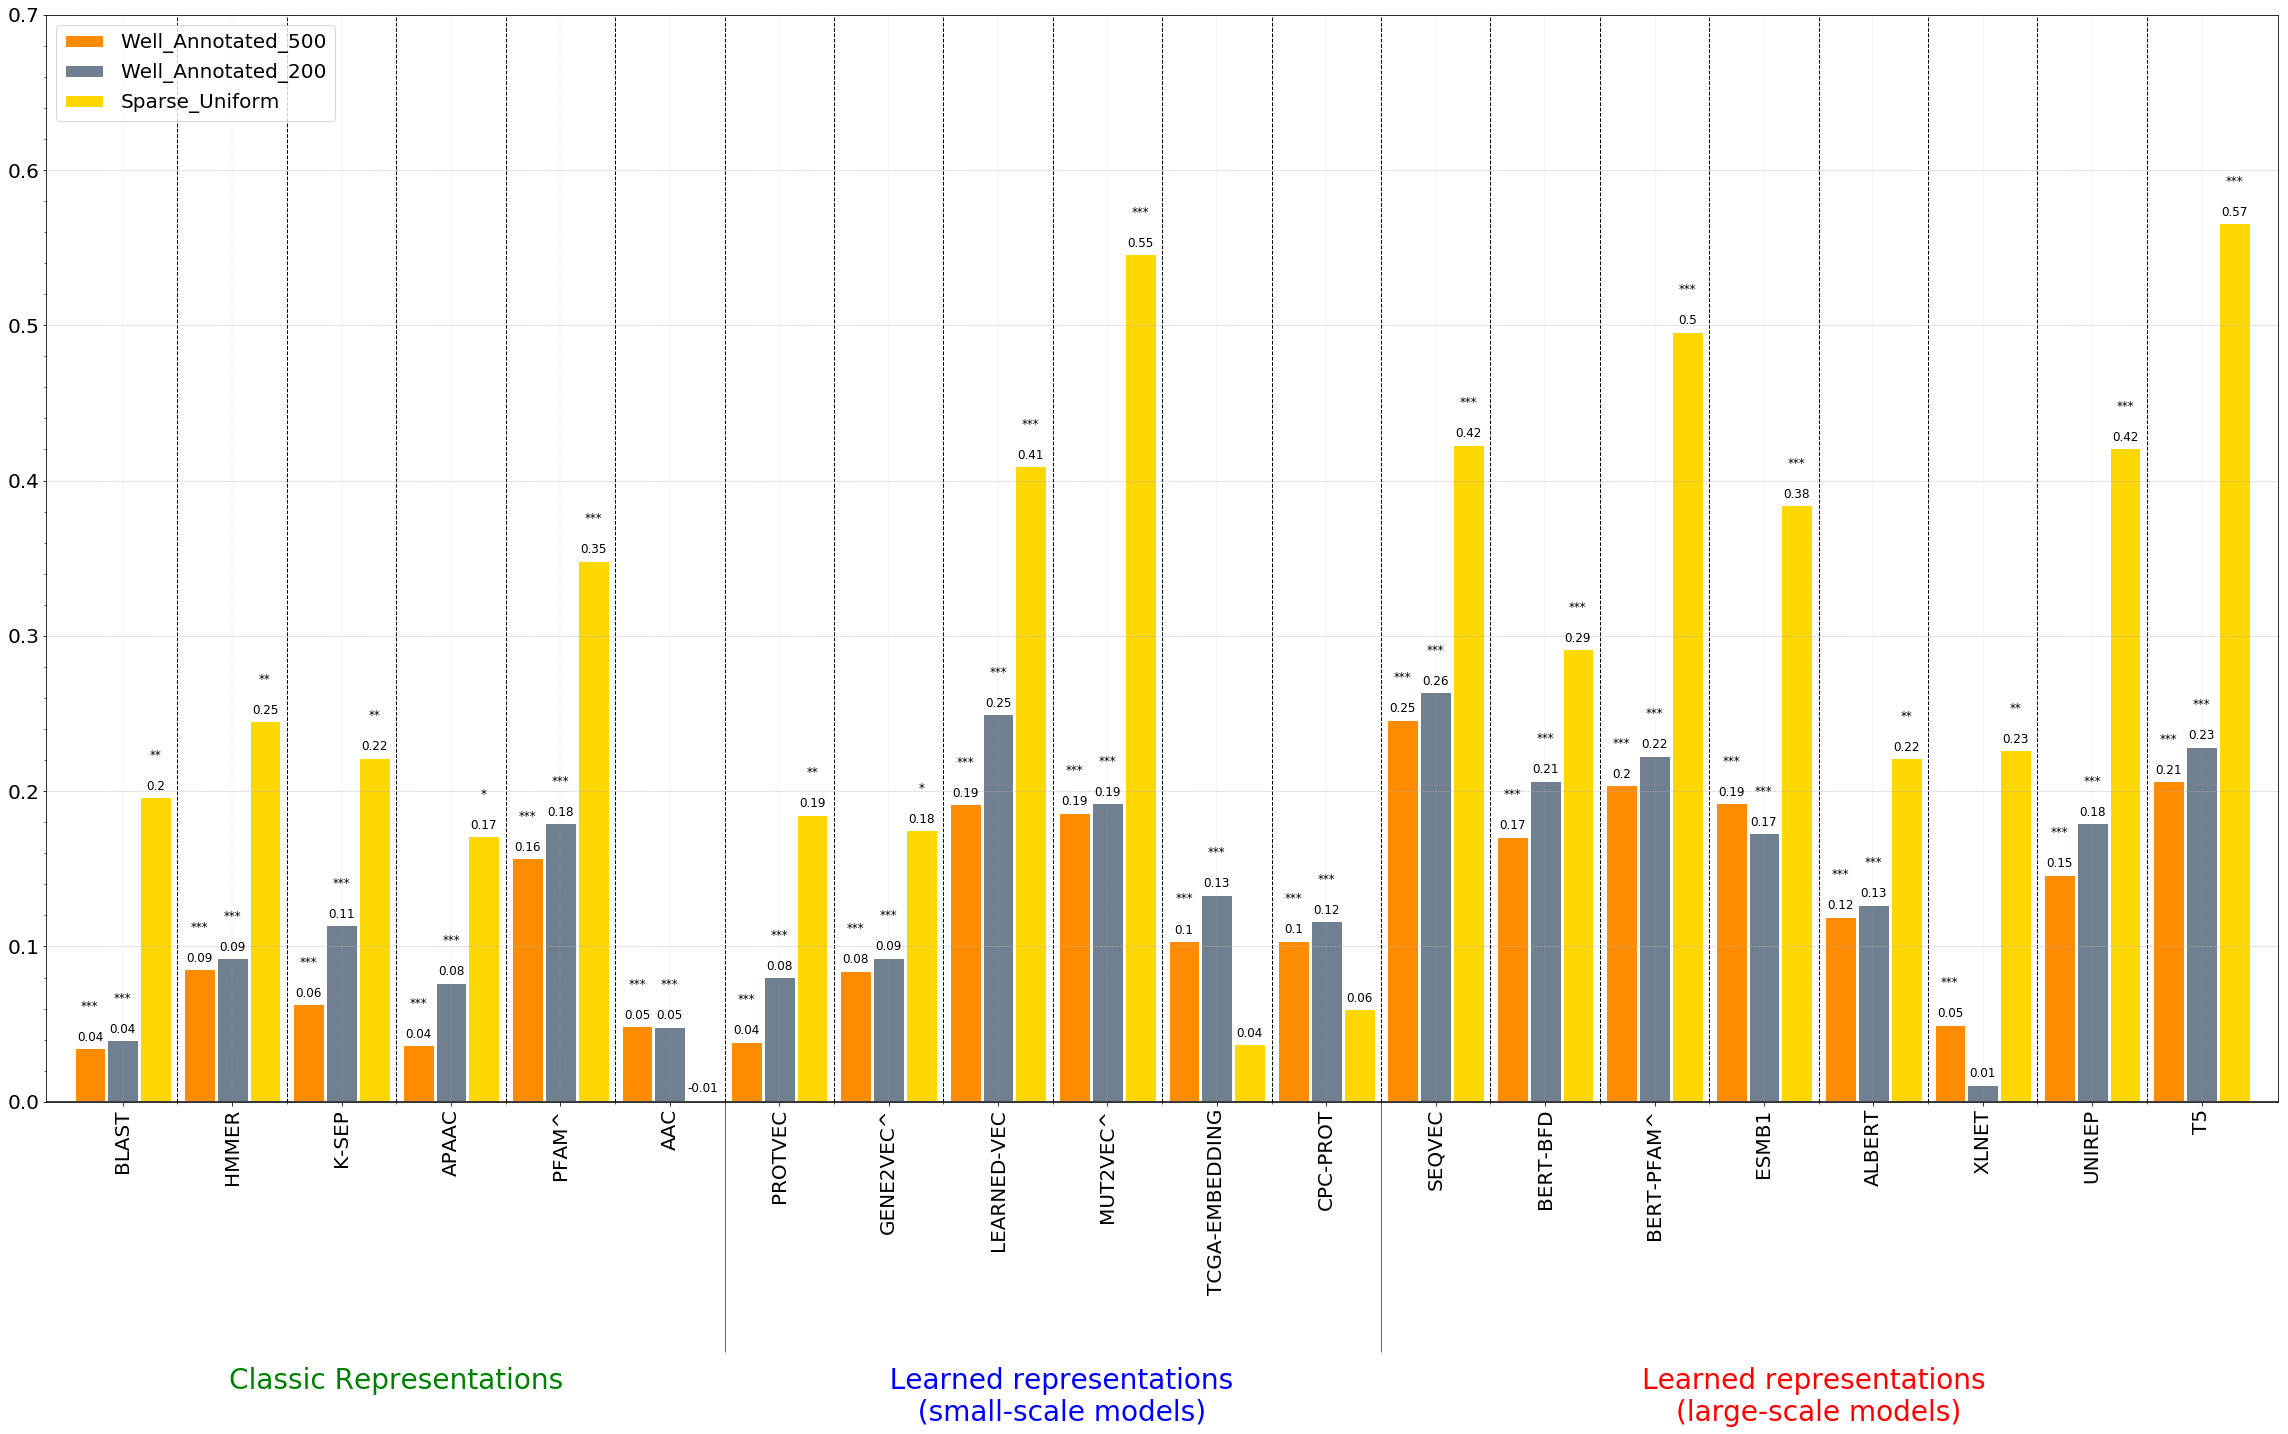

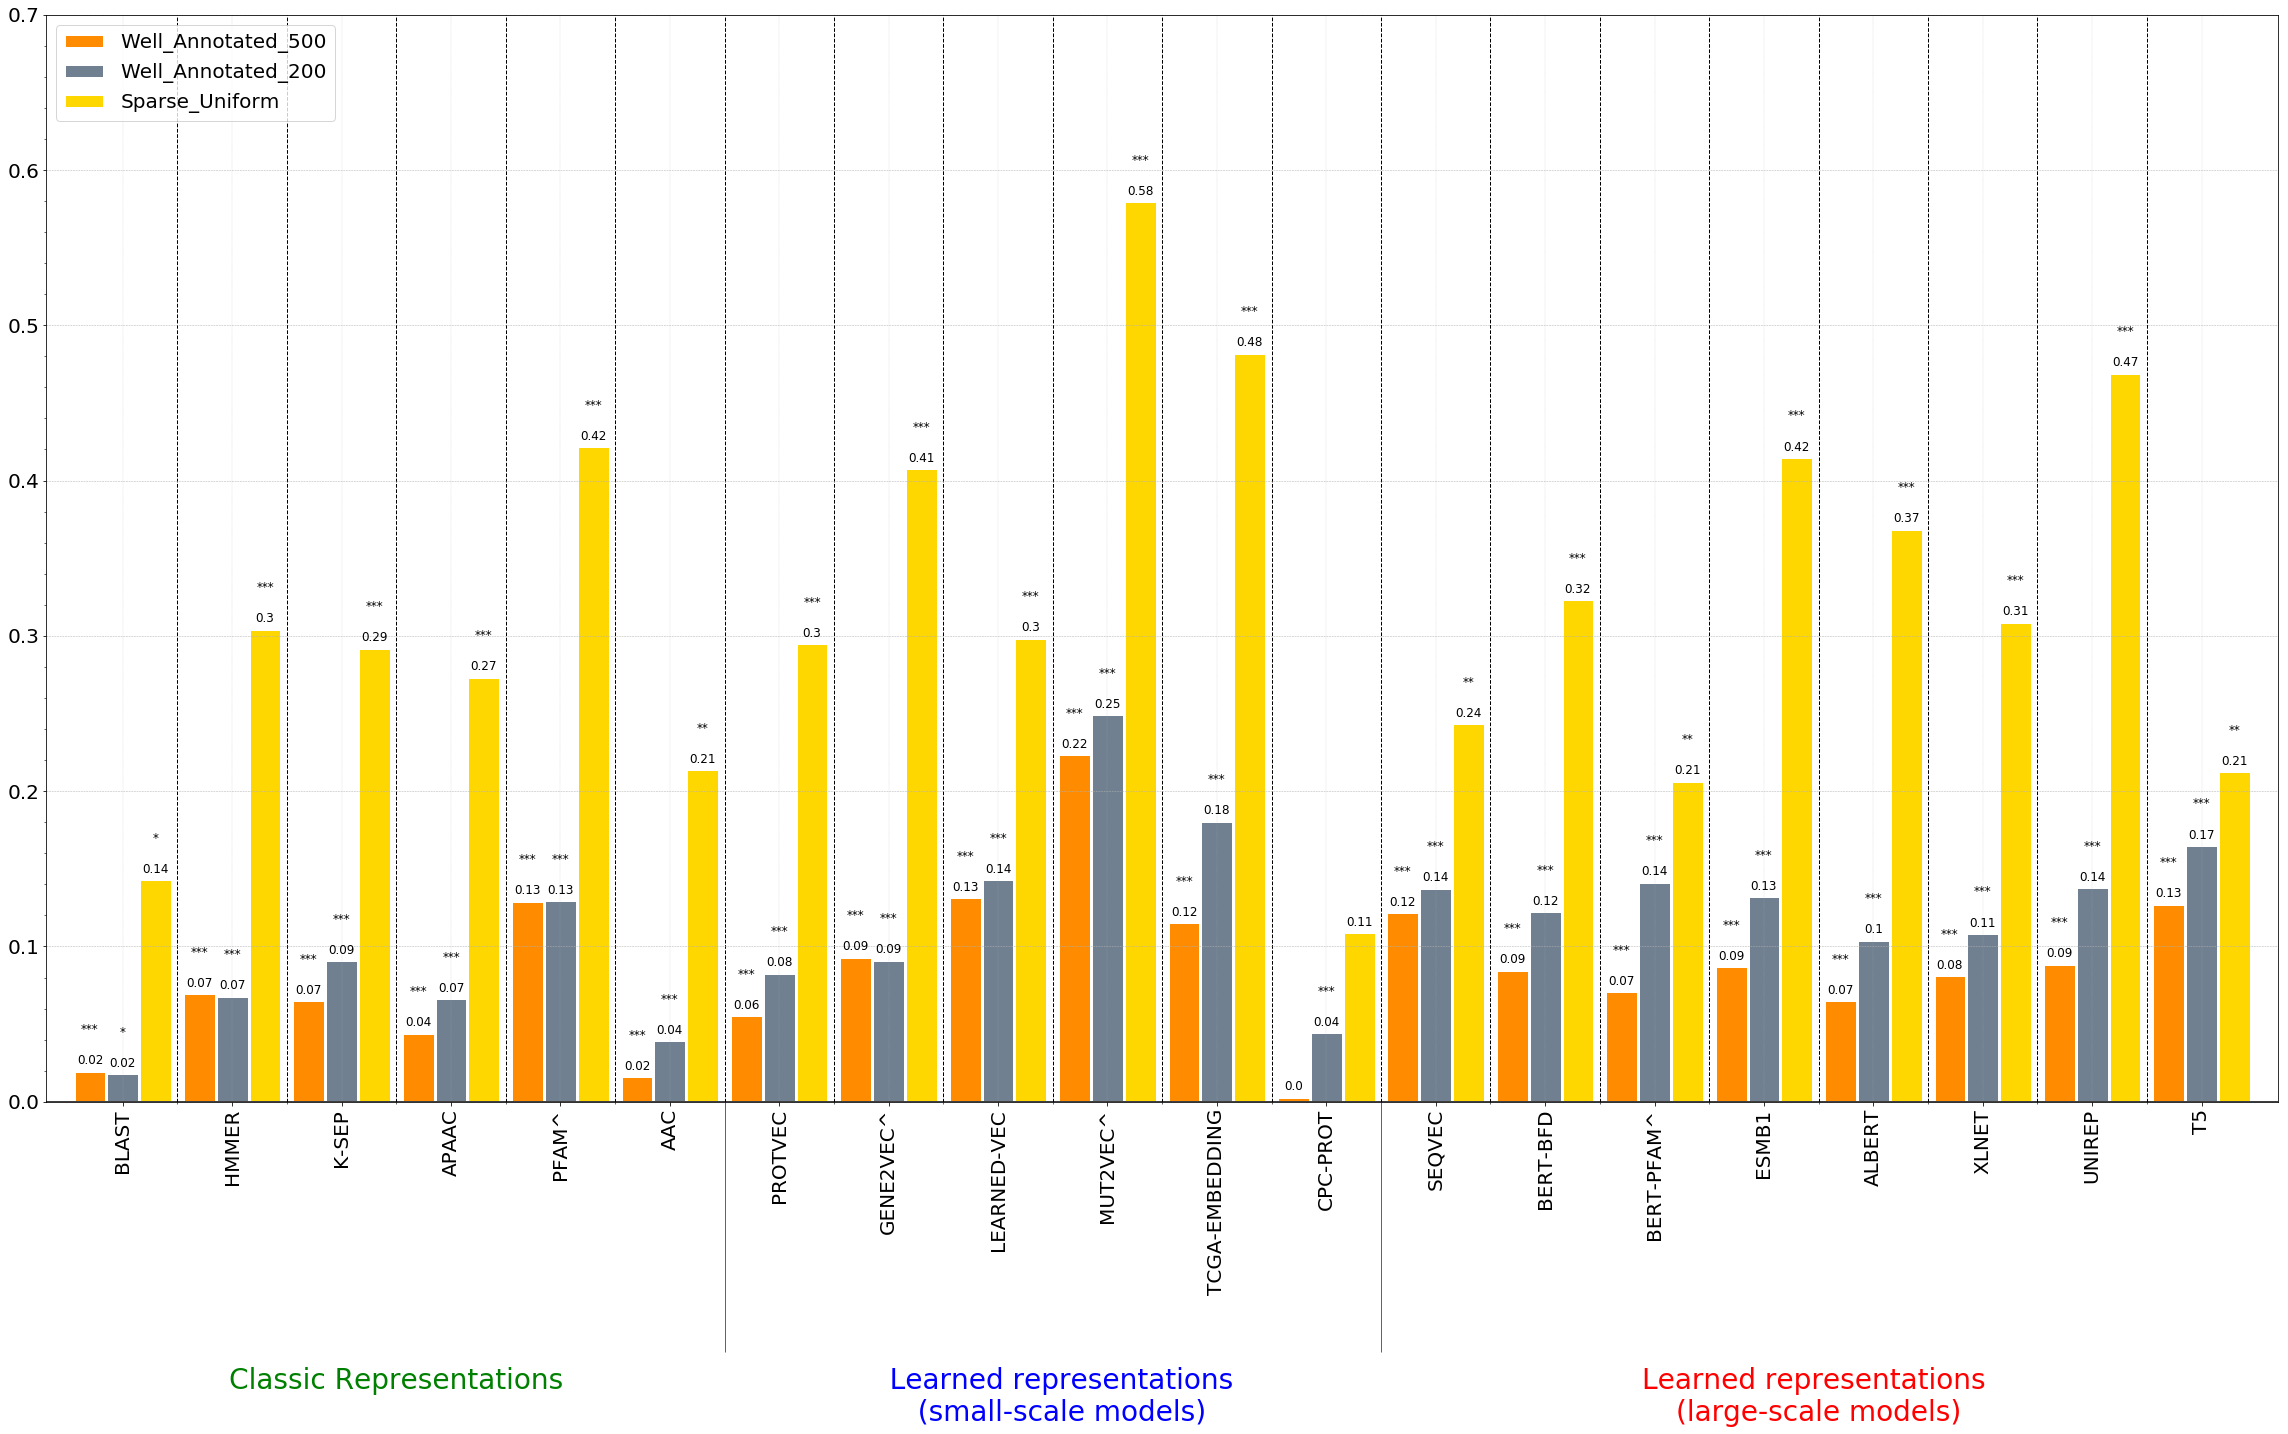

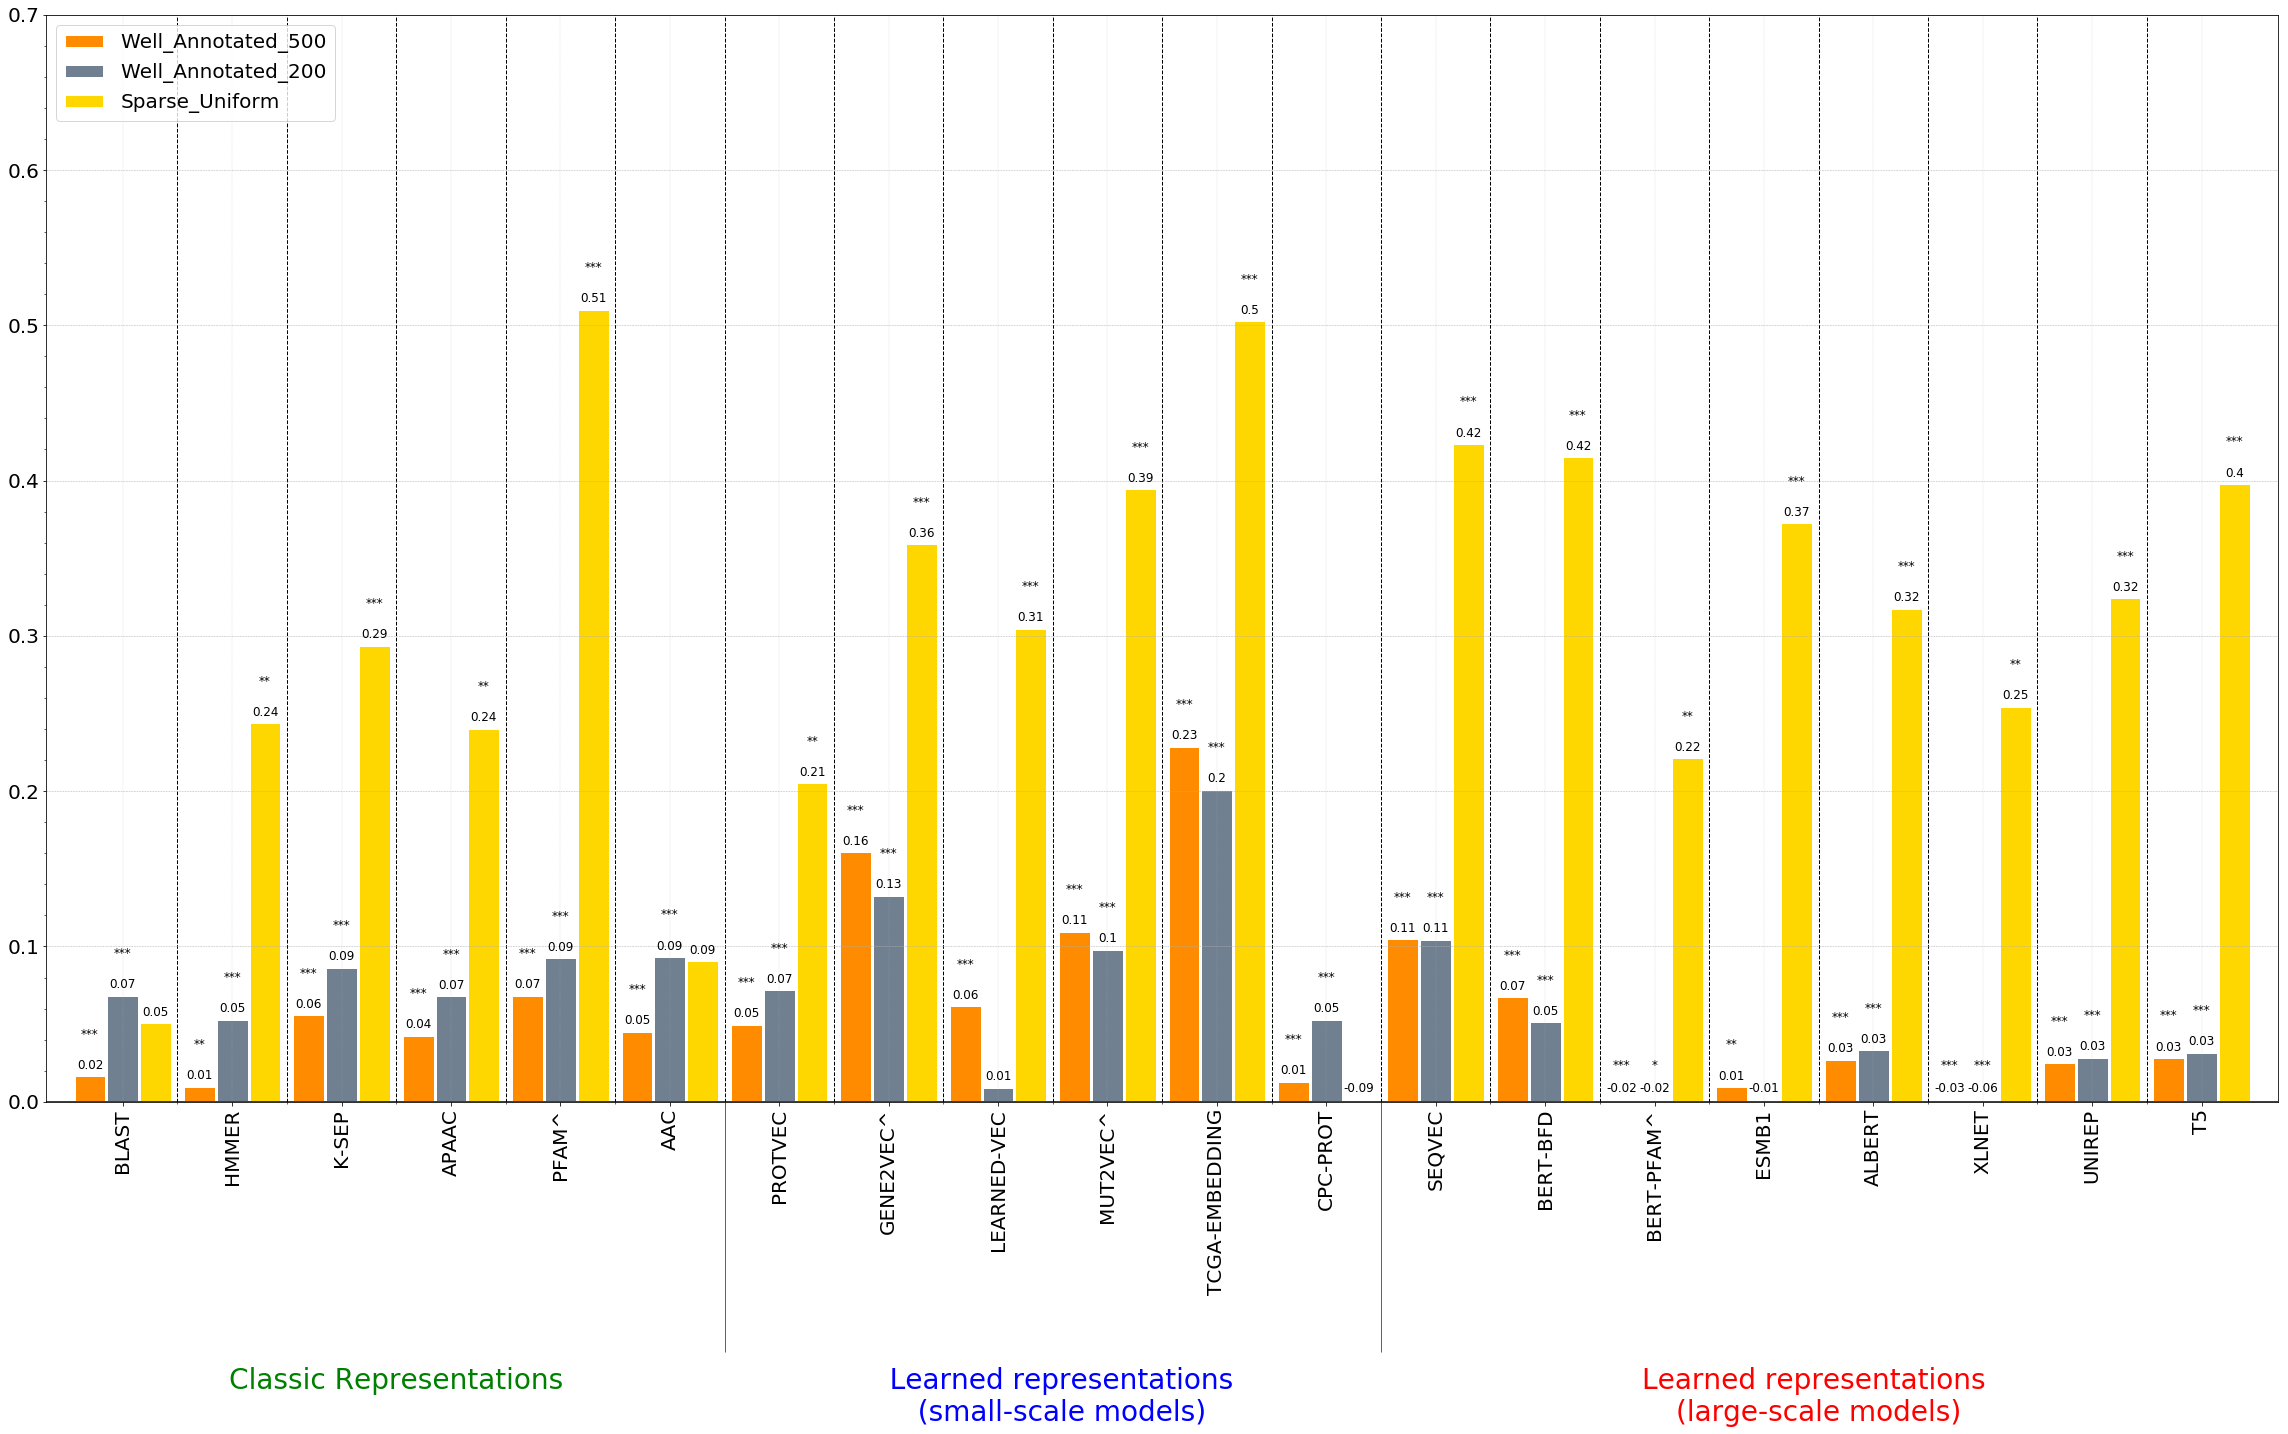

In [41]:
manhattan_MF,manhattan_BP,manhattan_CC,embedding_lables = prepare_data_for_measure('ManhattanSim_Correlation')
manhattan_MF_pvals,manhattan_BP_pvals,manhattan_CC_pvals,embedding_lables = prepare_data_for_measure('ManhattanSim_Correlation p-value')

drawBenchmarks2(manhattan_MF,manhattan_MF_pvals,embedding_lables,"ManhattanSim_Correlation_MF.eps")
drawBenchmarks2(manhattan_BP,manhattan_BP_pvals,embedding_lables,"ManhattanSim_Correlation_BP.eps")
drawBenchmarks2(manhattan_CC,manhattan_CC_pvals,embedding_lables,"ManhattanSim_Correlation_CC.eps")

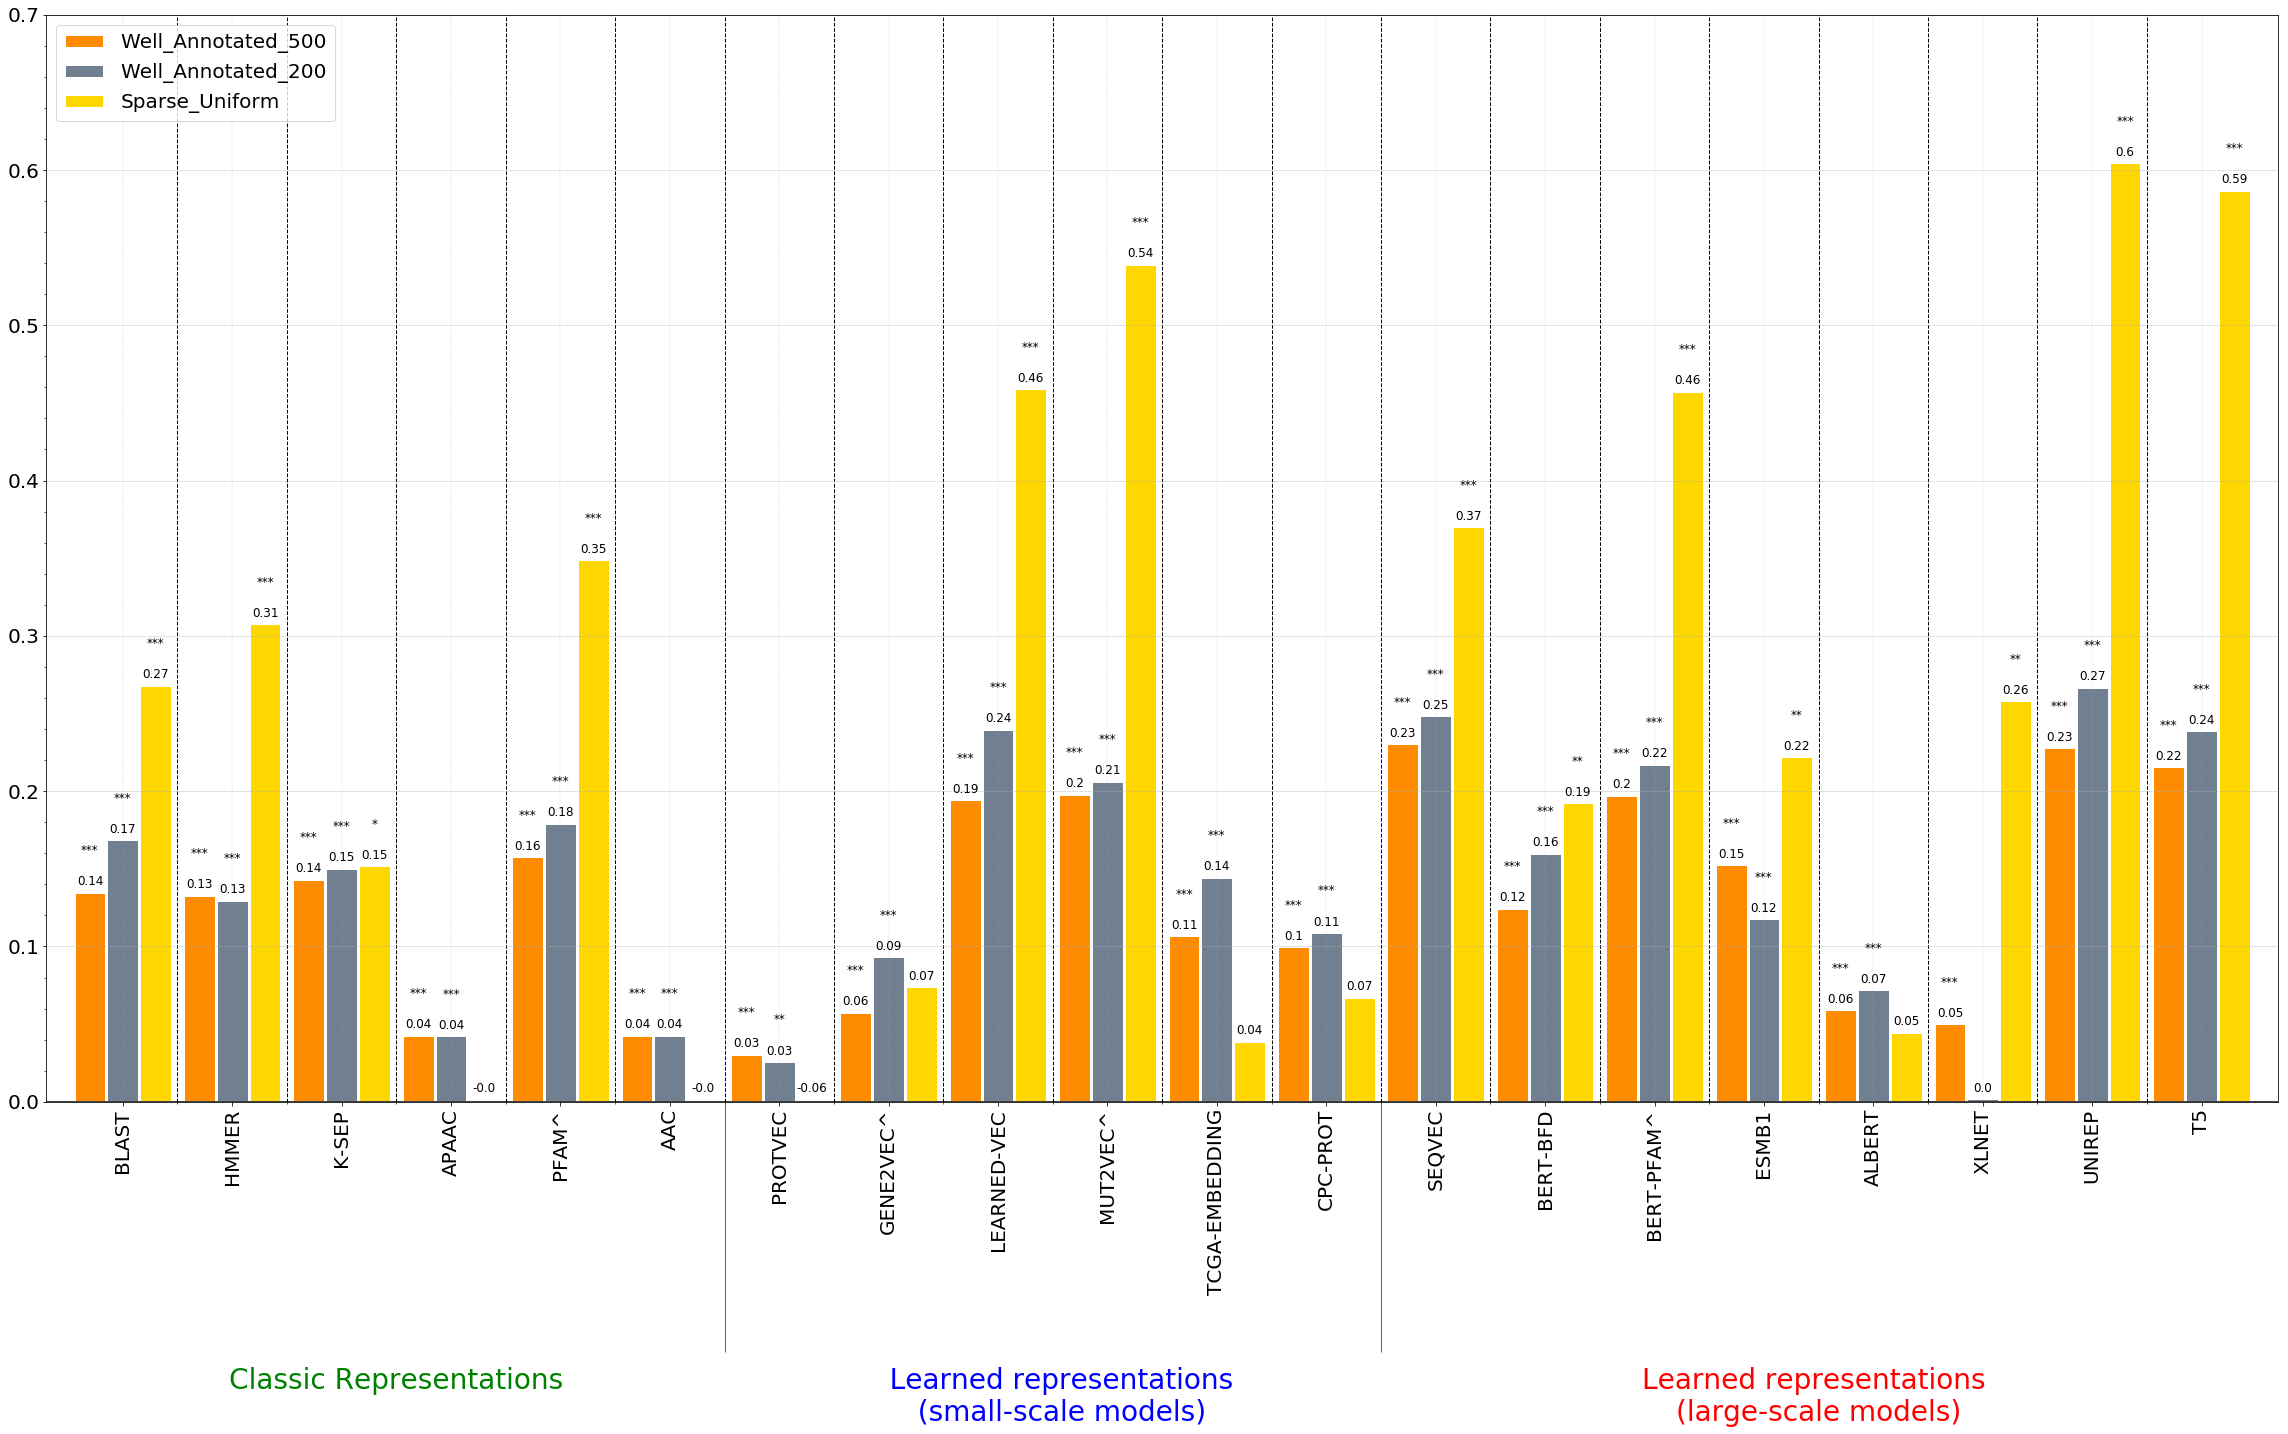

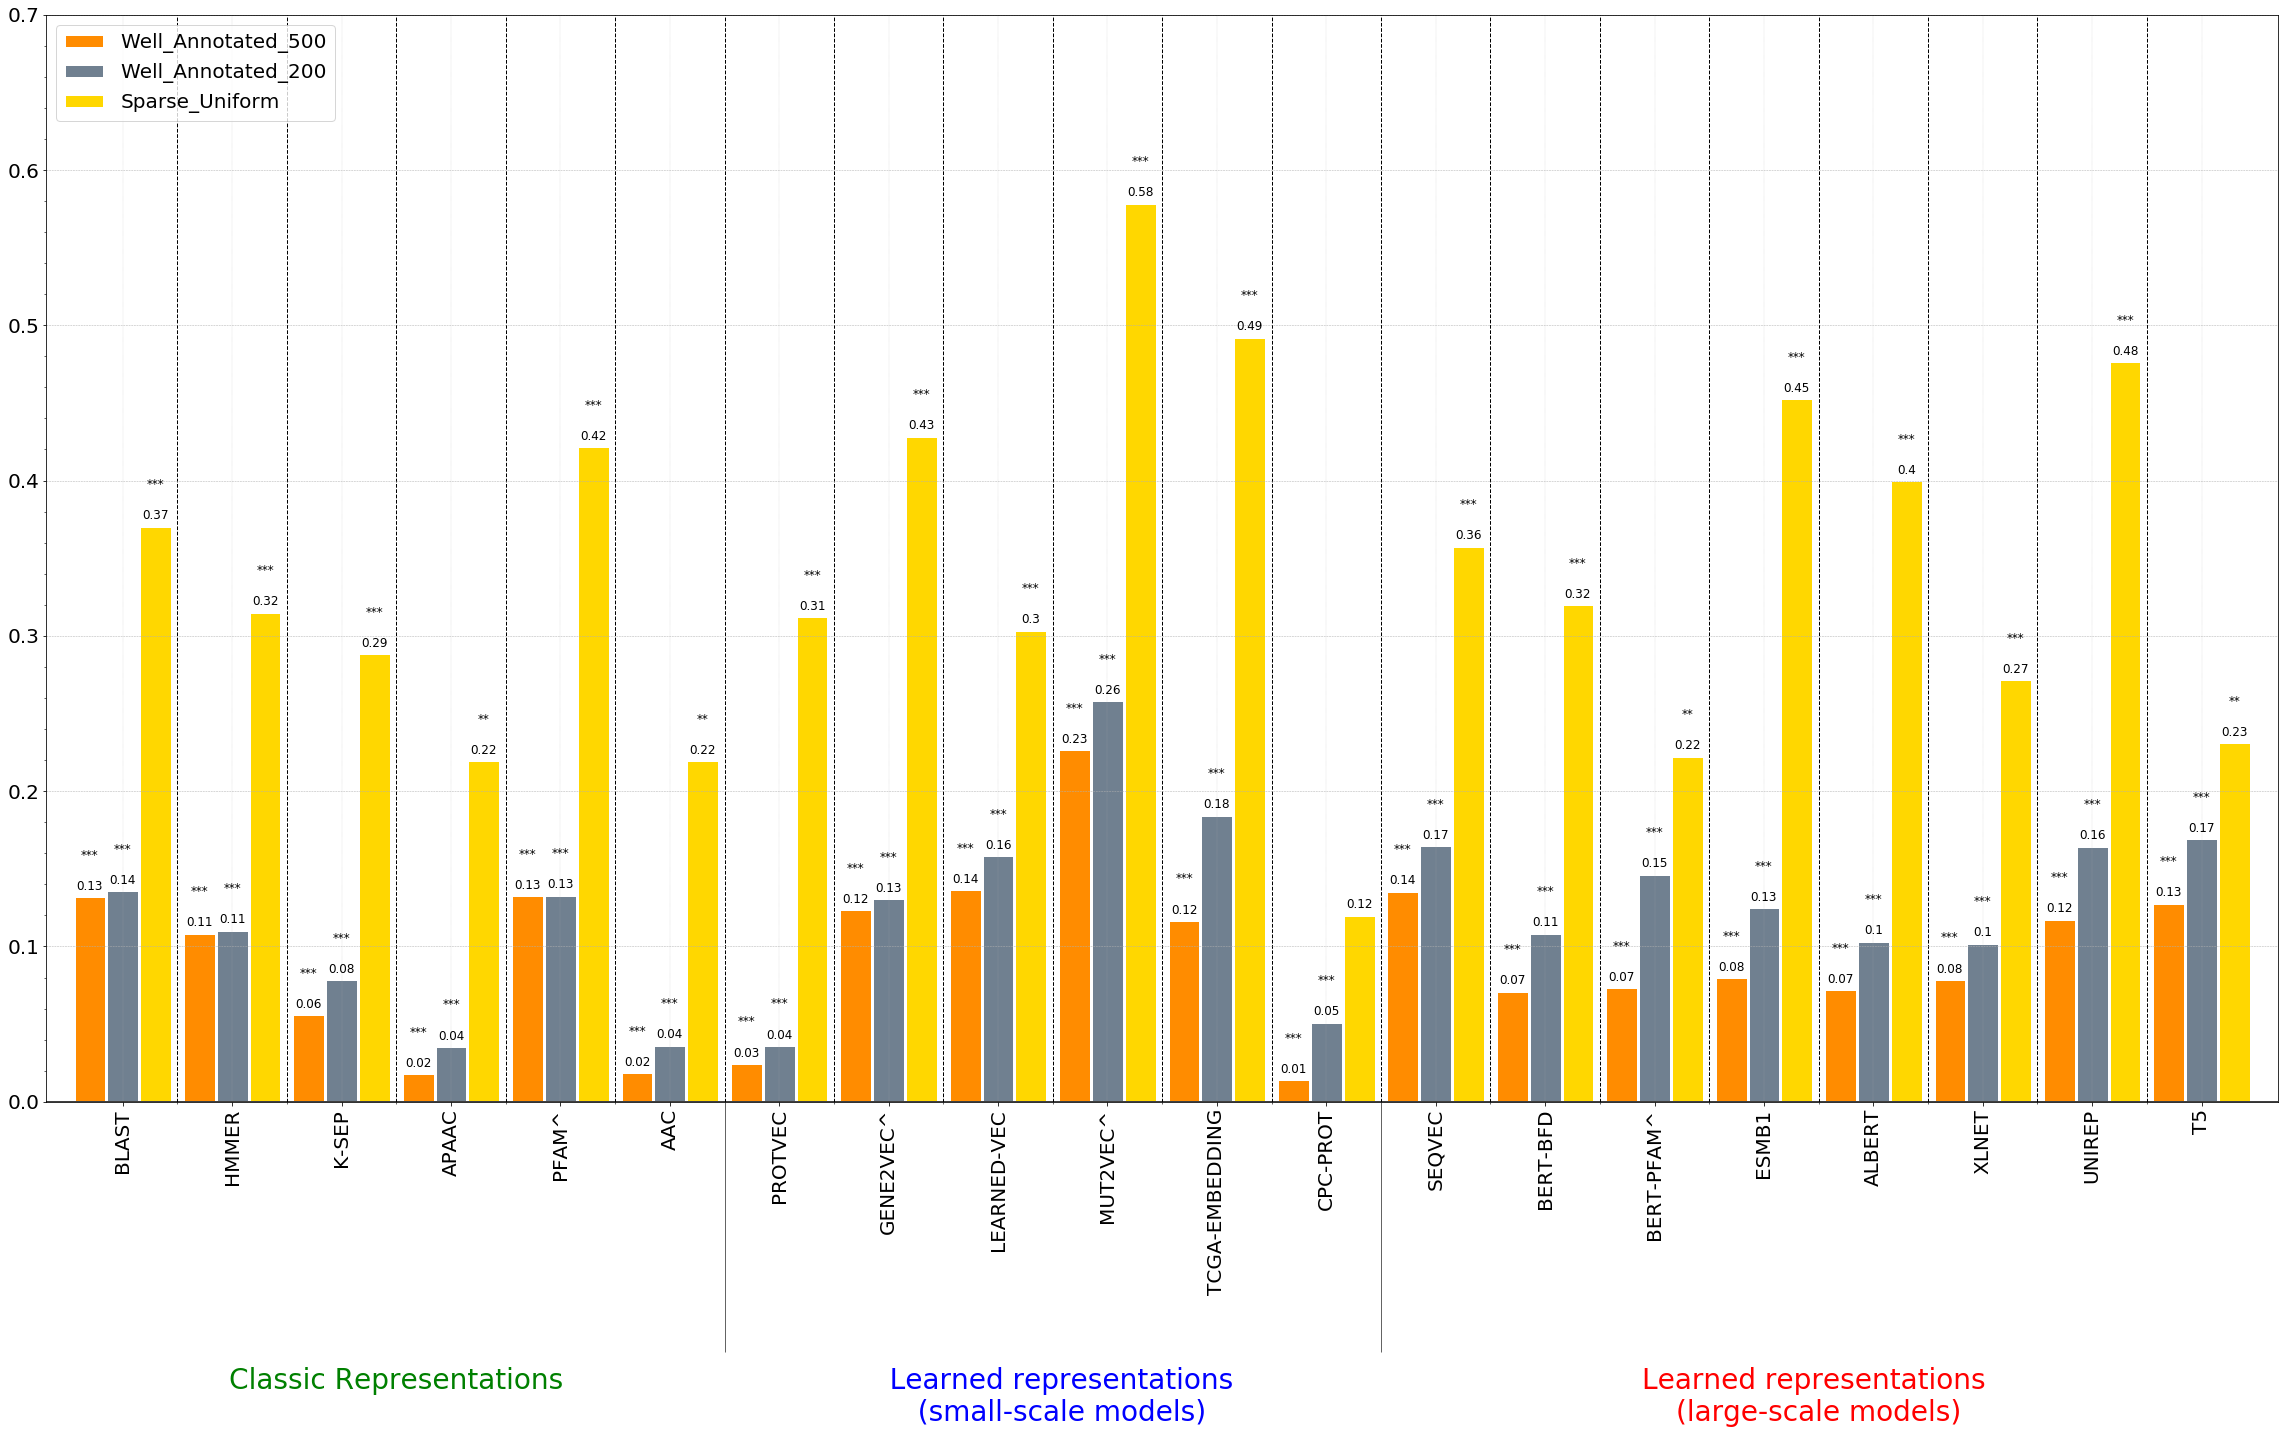

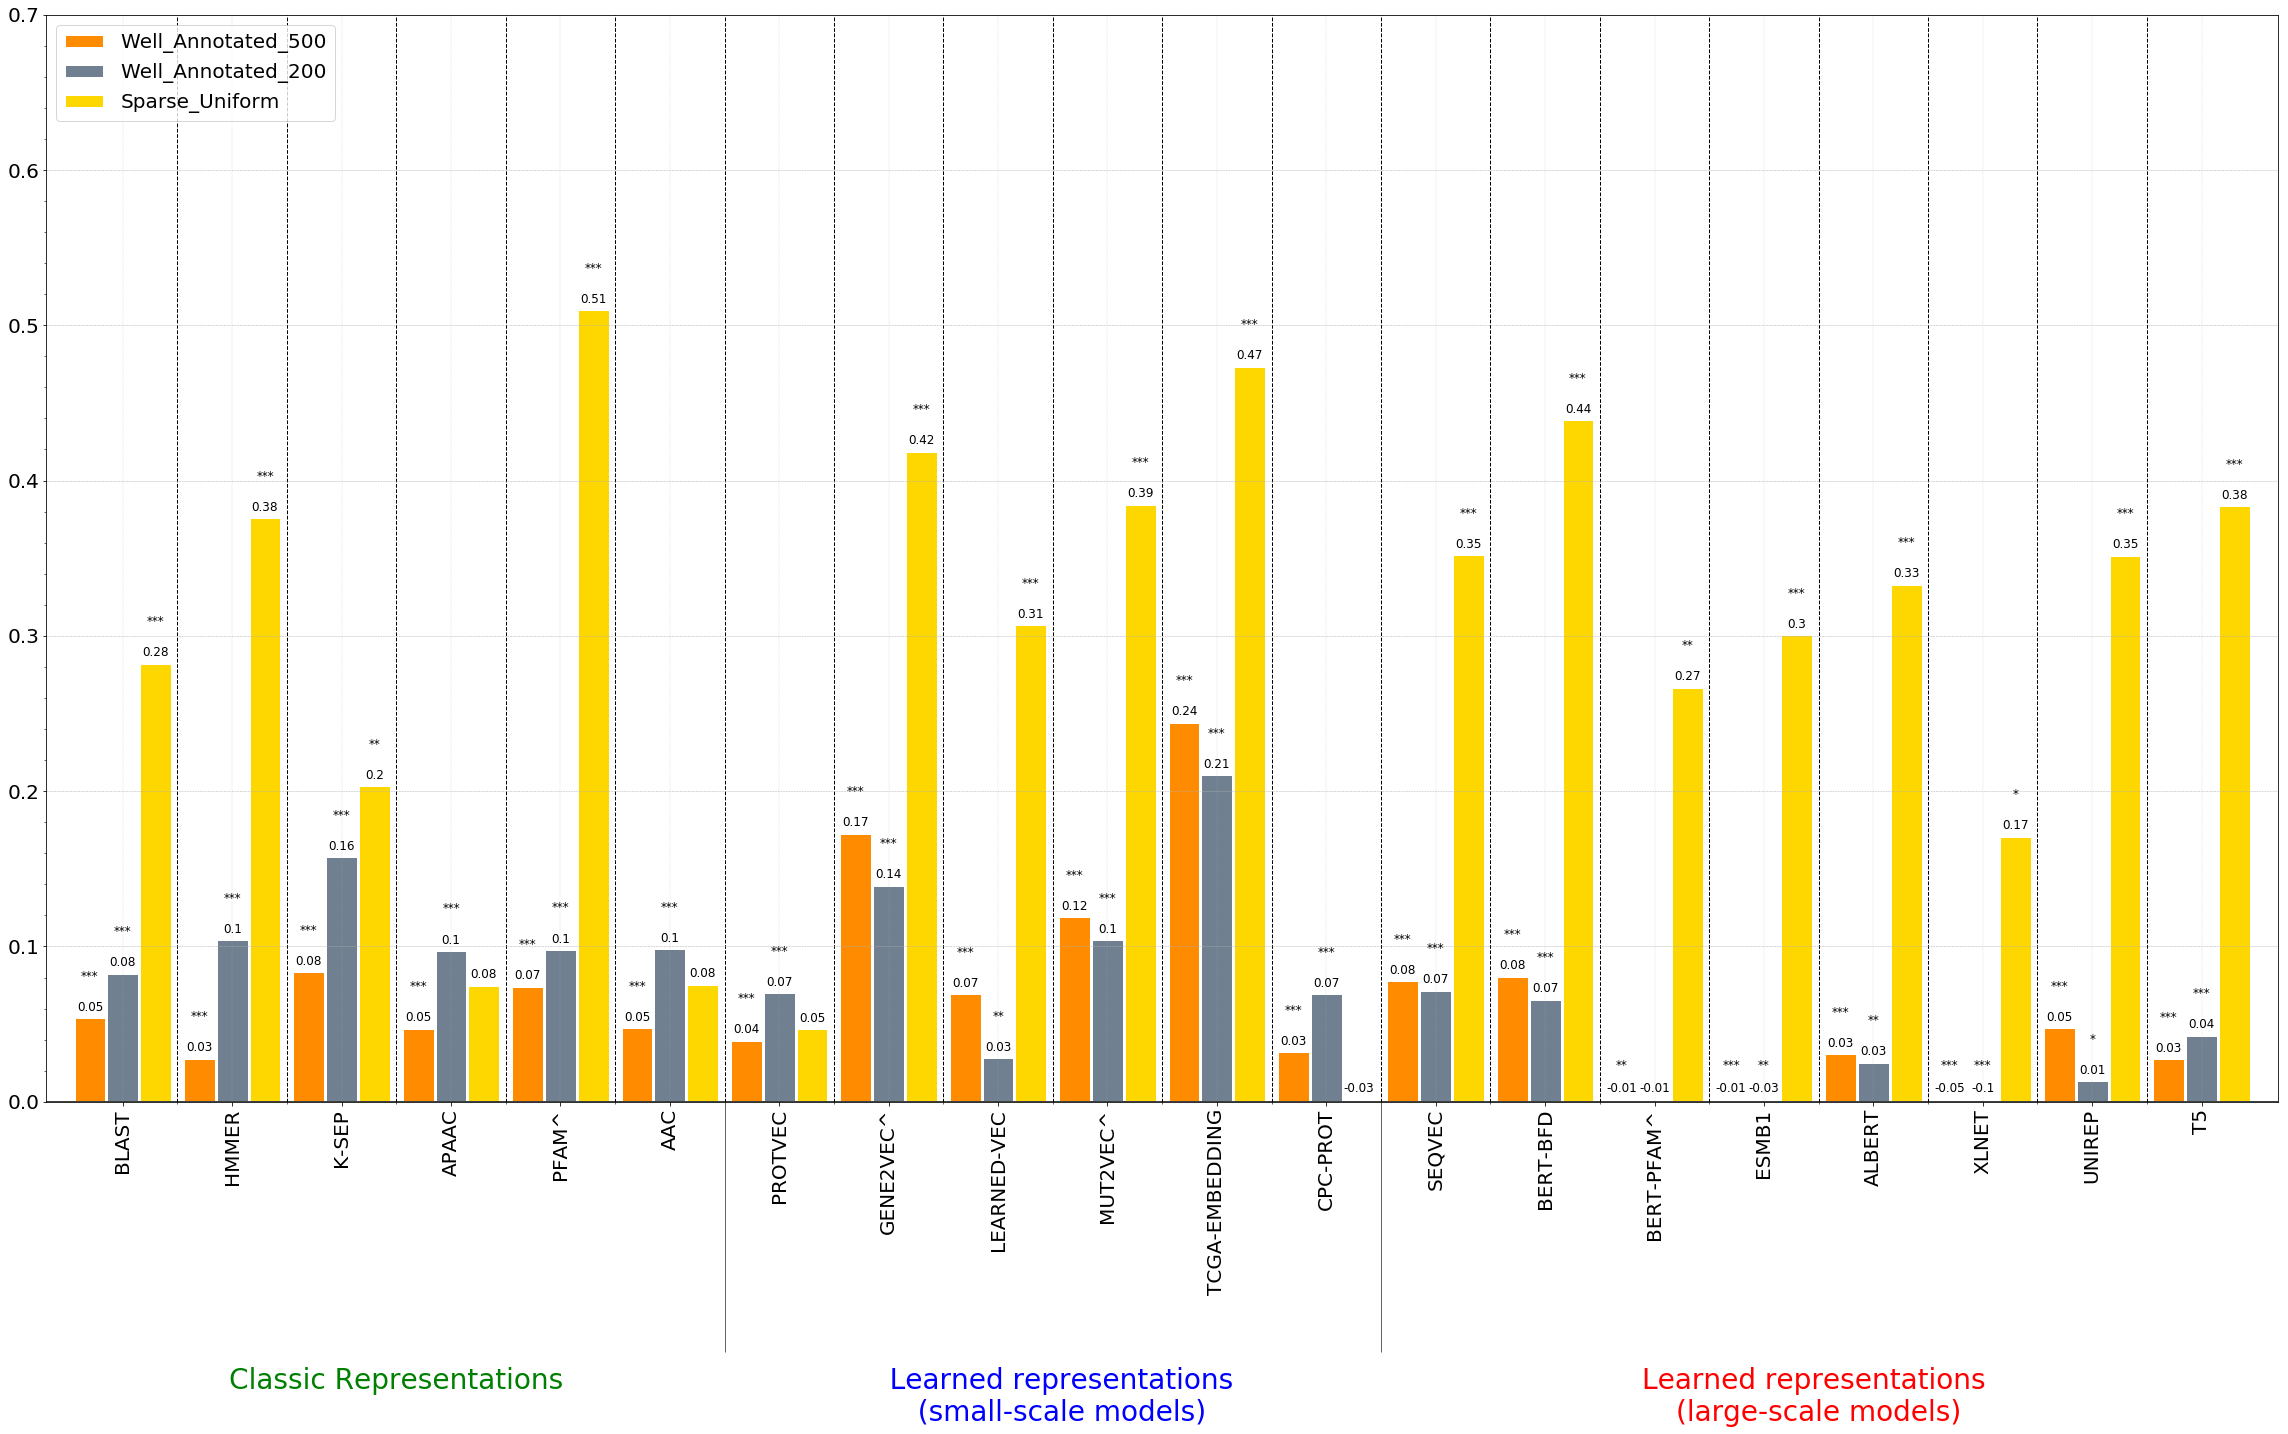

In [42]:
cosine_MF,cosine_BP,cosine_CC,embedding_lables = prepare_data_for_measure('CosineSim_Correlation')
cosine_MF_pvals,cosine_BP_pvals,cosine_CC_pvals,embedding_lables = prepare_data_for_measure('CosineSim_Correlation p-value')

drawBenchmarks2(cosine_MF,cosine_MF_pvals,embedding_lables,"CosineSim_Correlation_MF.eps")
drawBenchmarks2(cosine_BP,cosine_BP_pvals,embedding_lables,"CosineSim_Correlation_BP.eps")
drawBenchmarks2(cosine_CC,cosine_CC_pvals,embedding_lables,"CosineSim_Correlation_CC.eps")

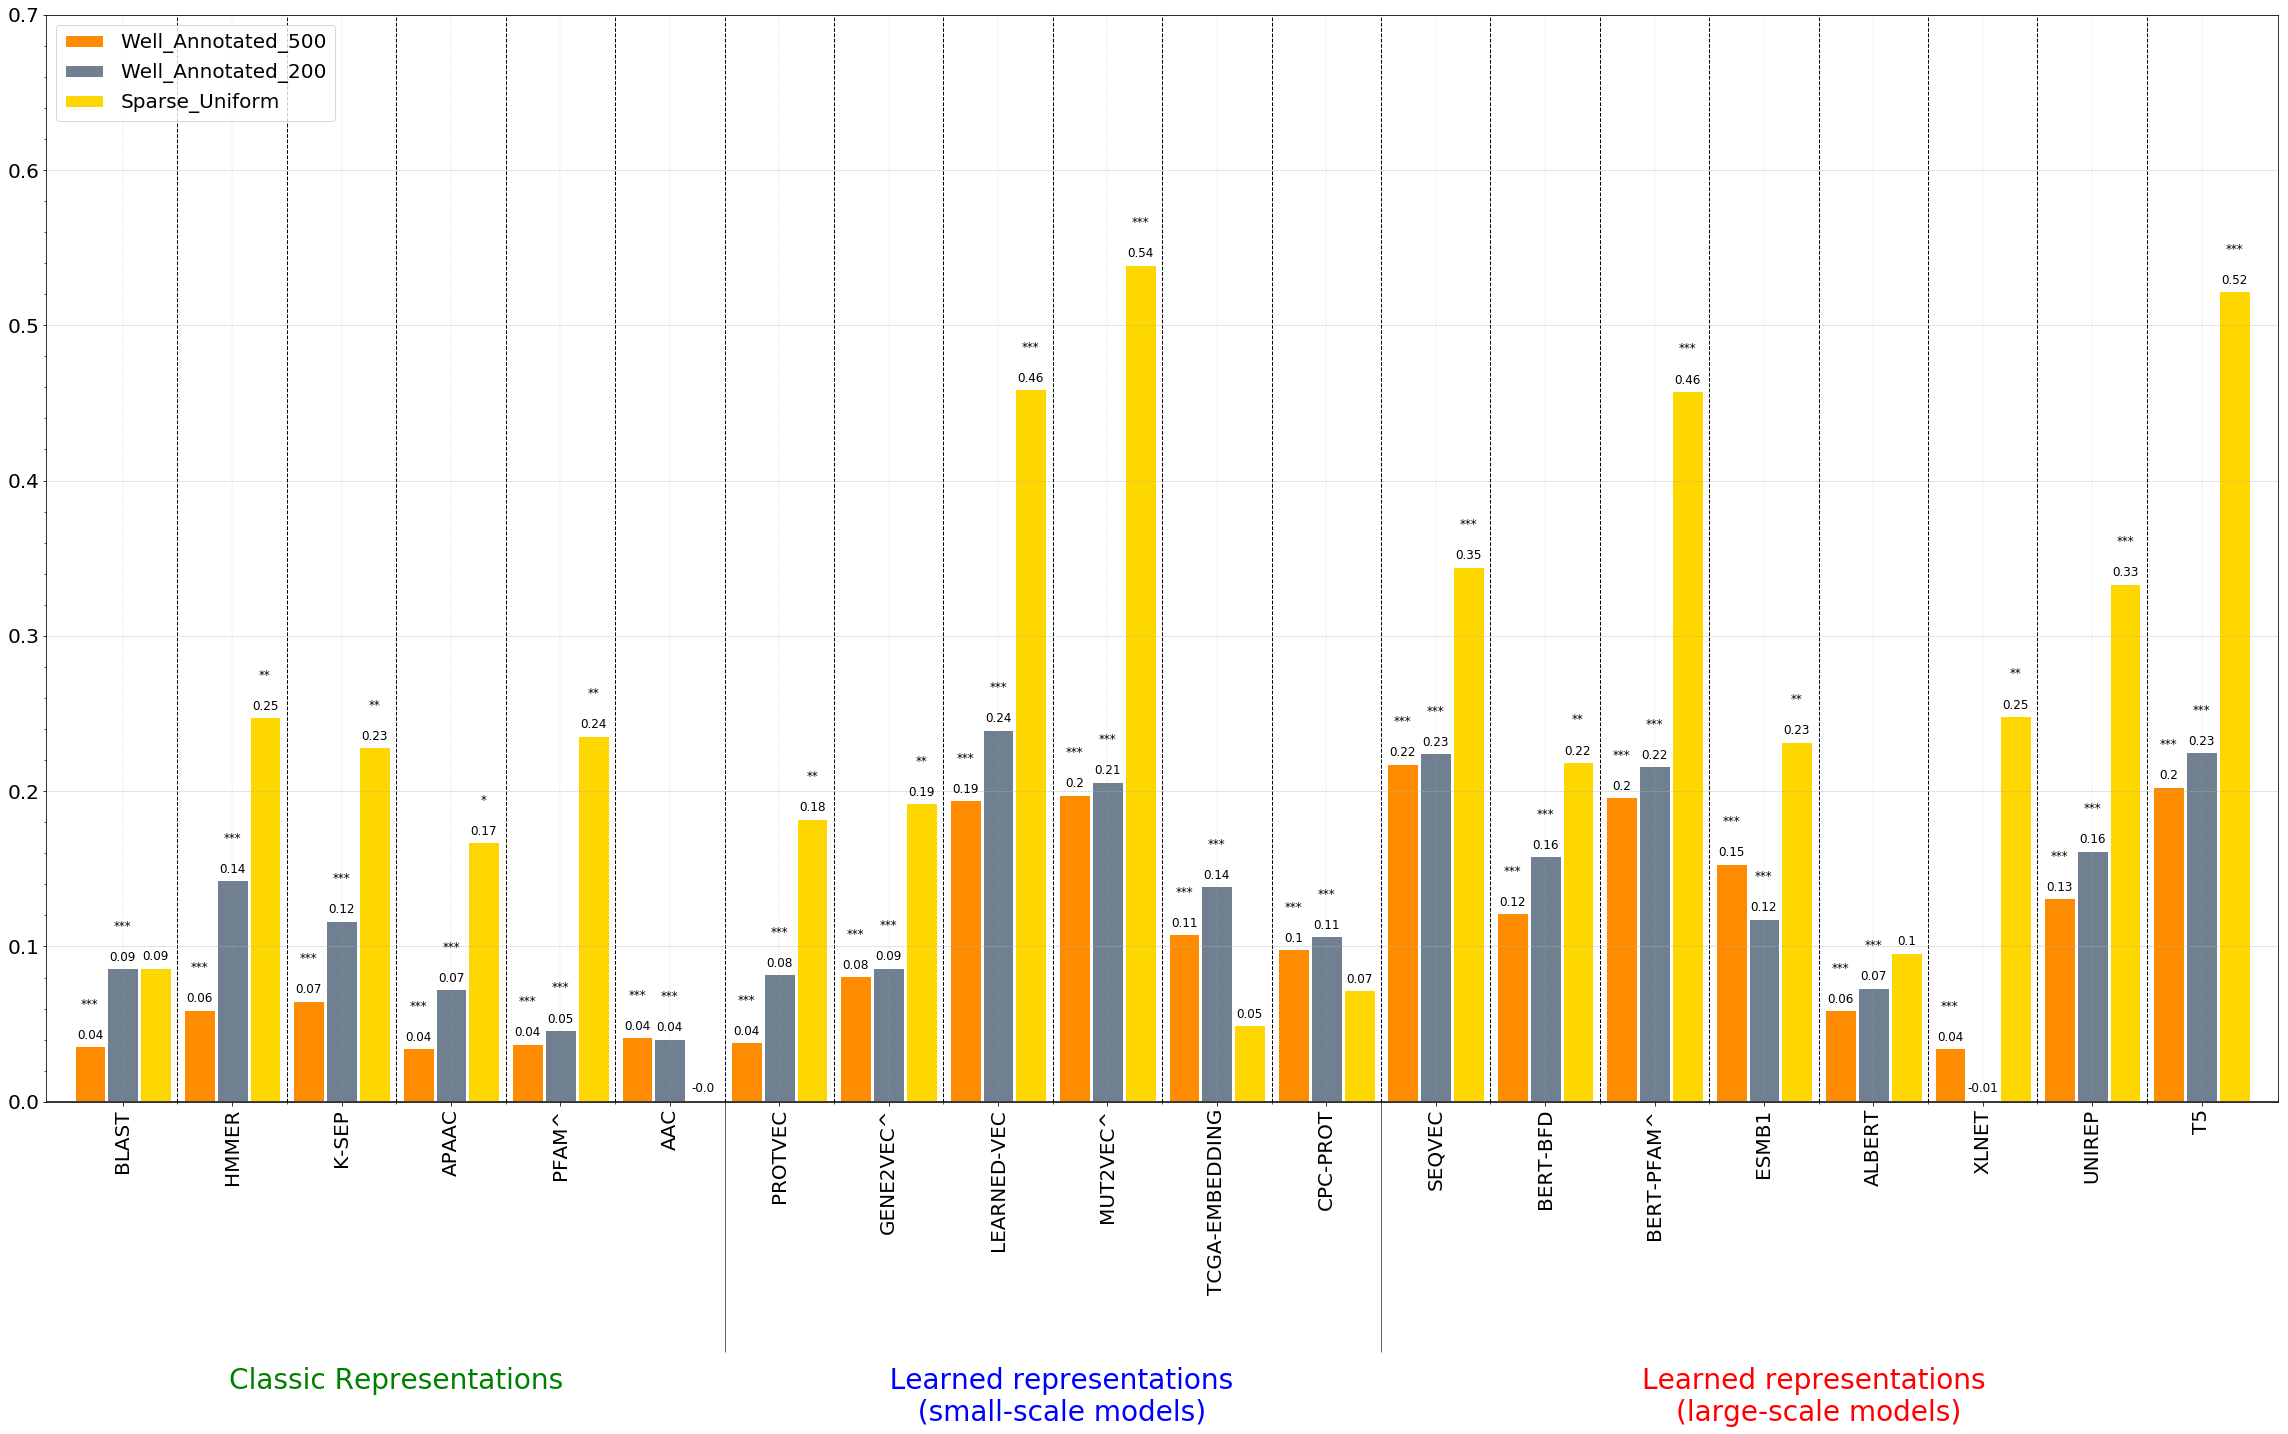

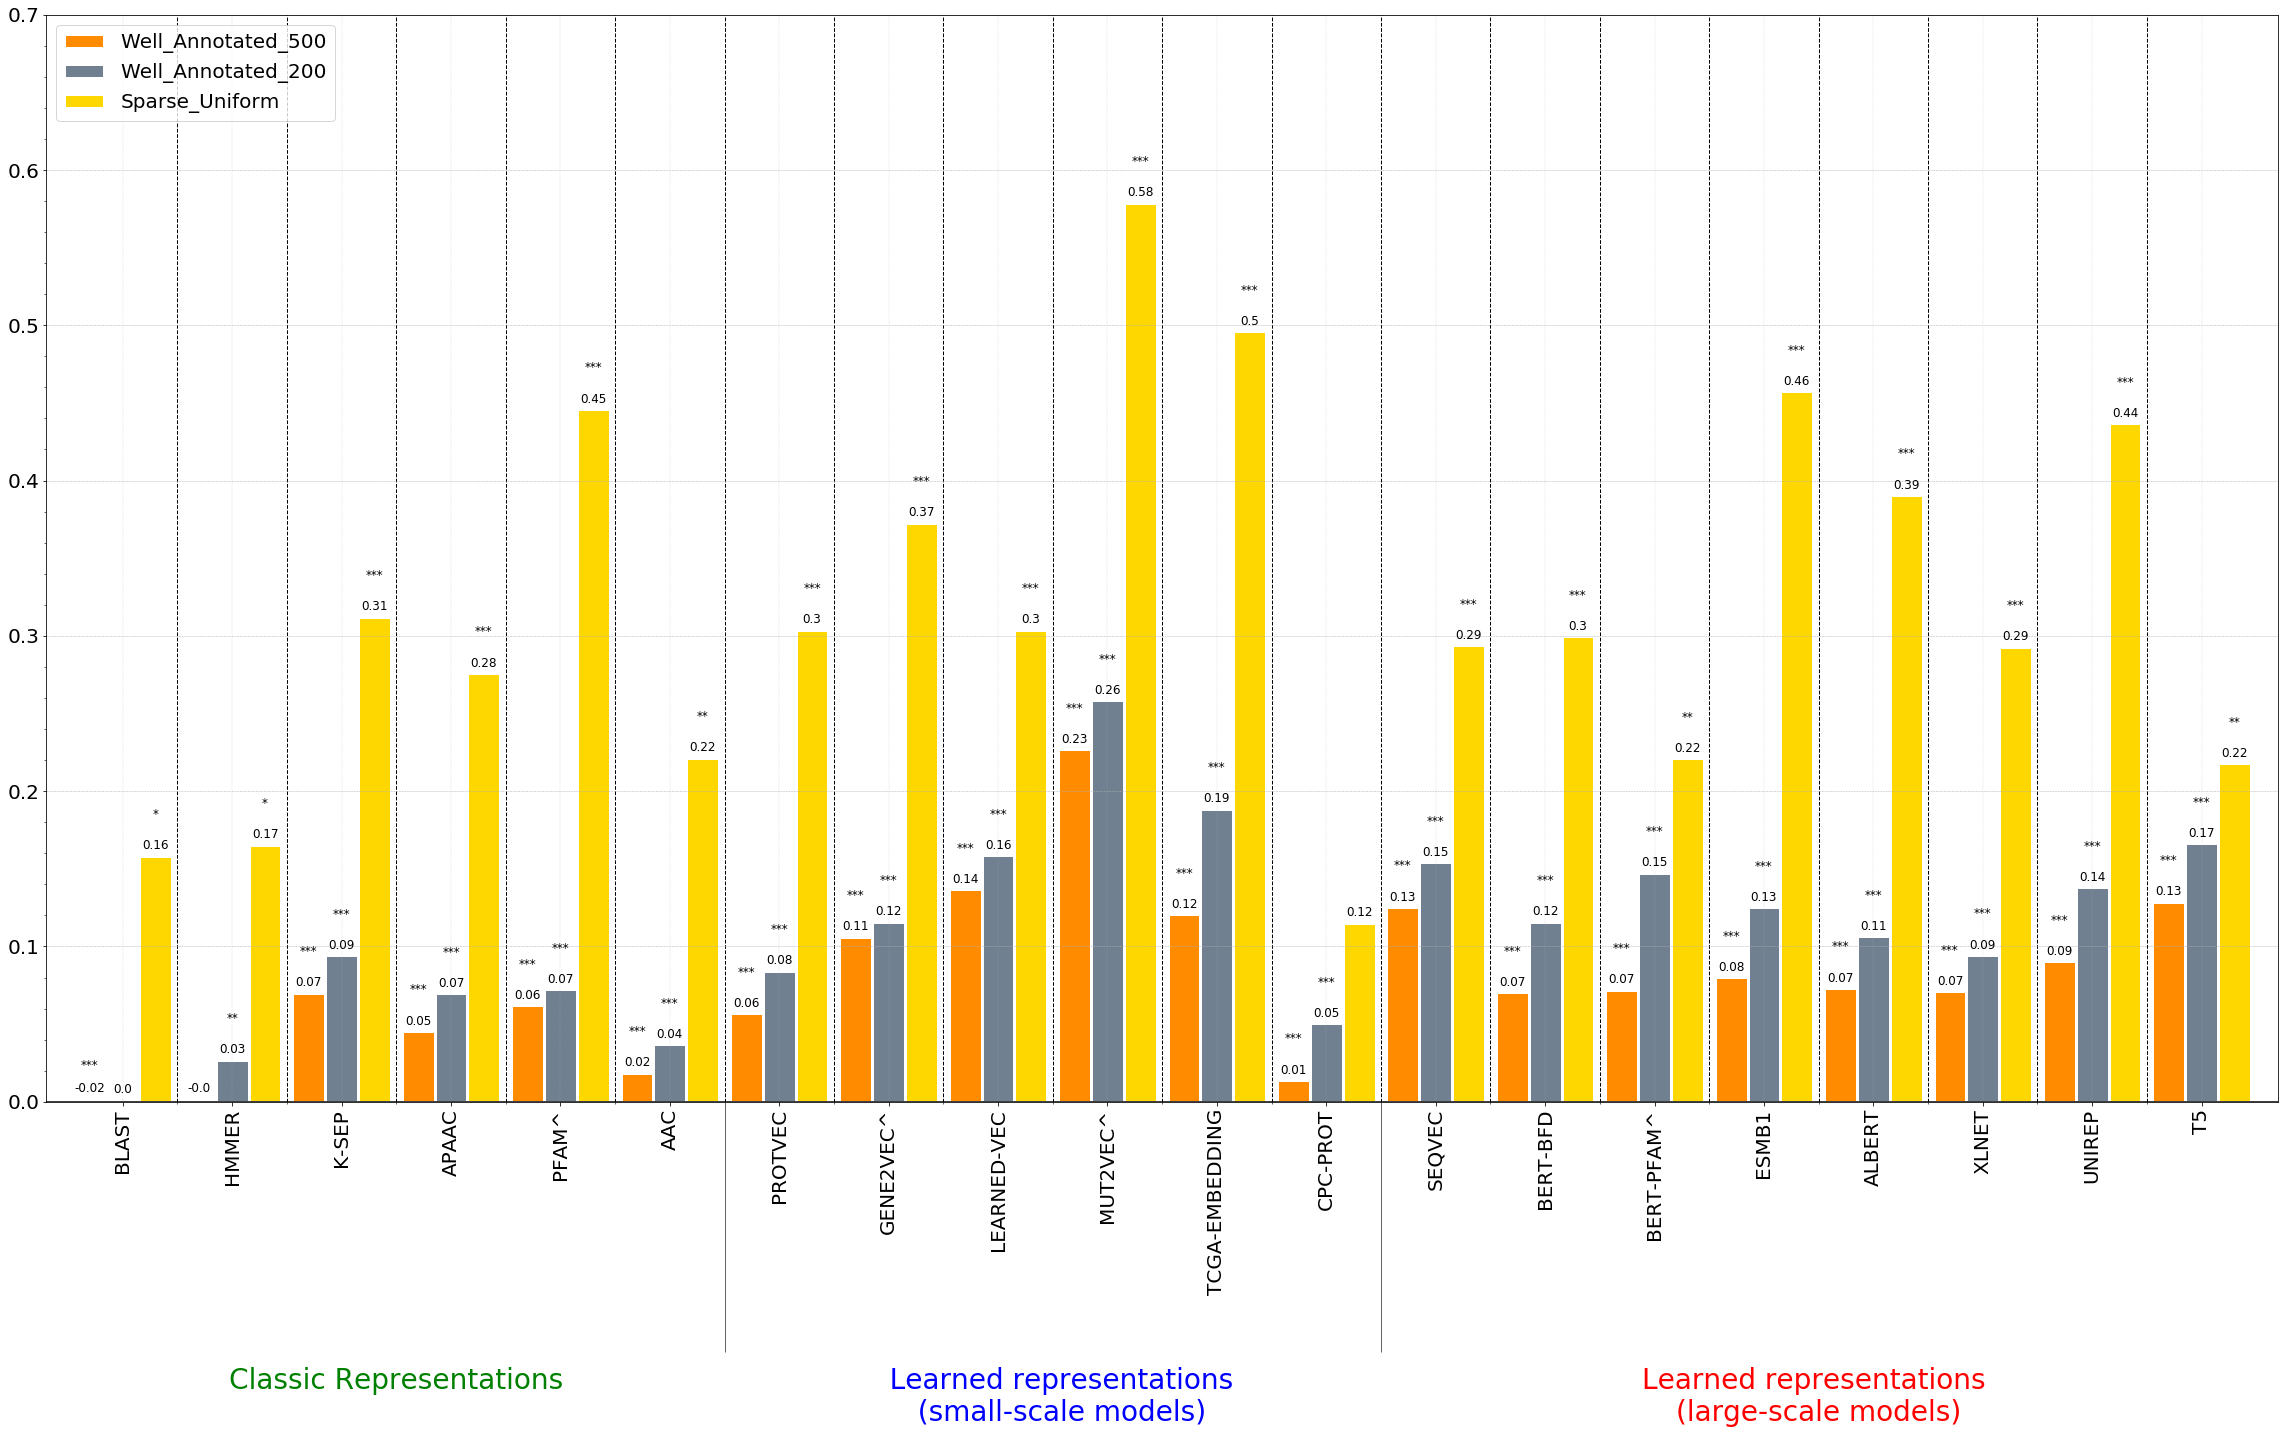

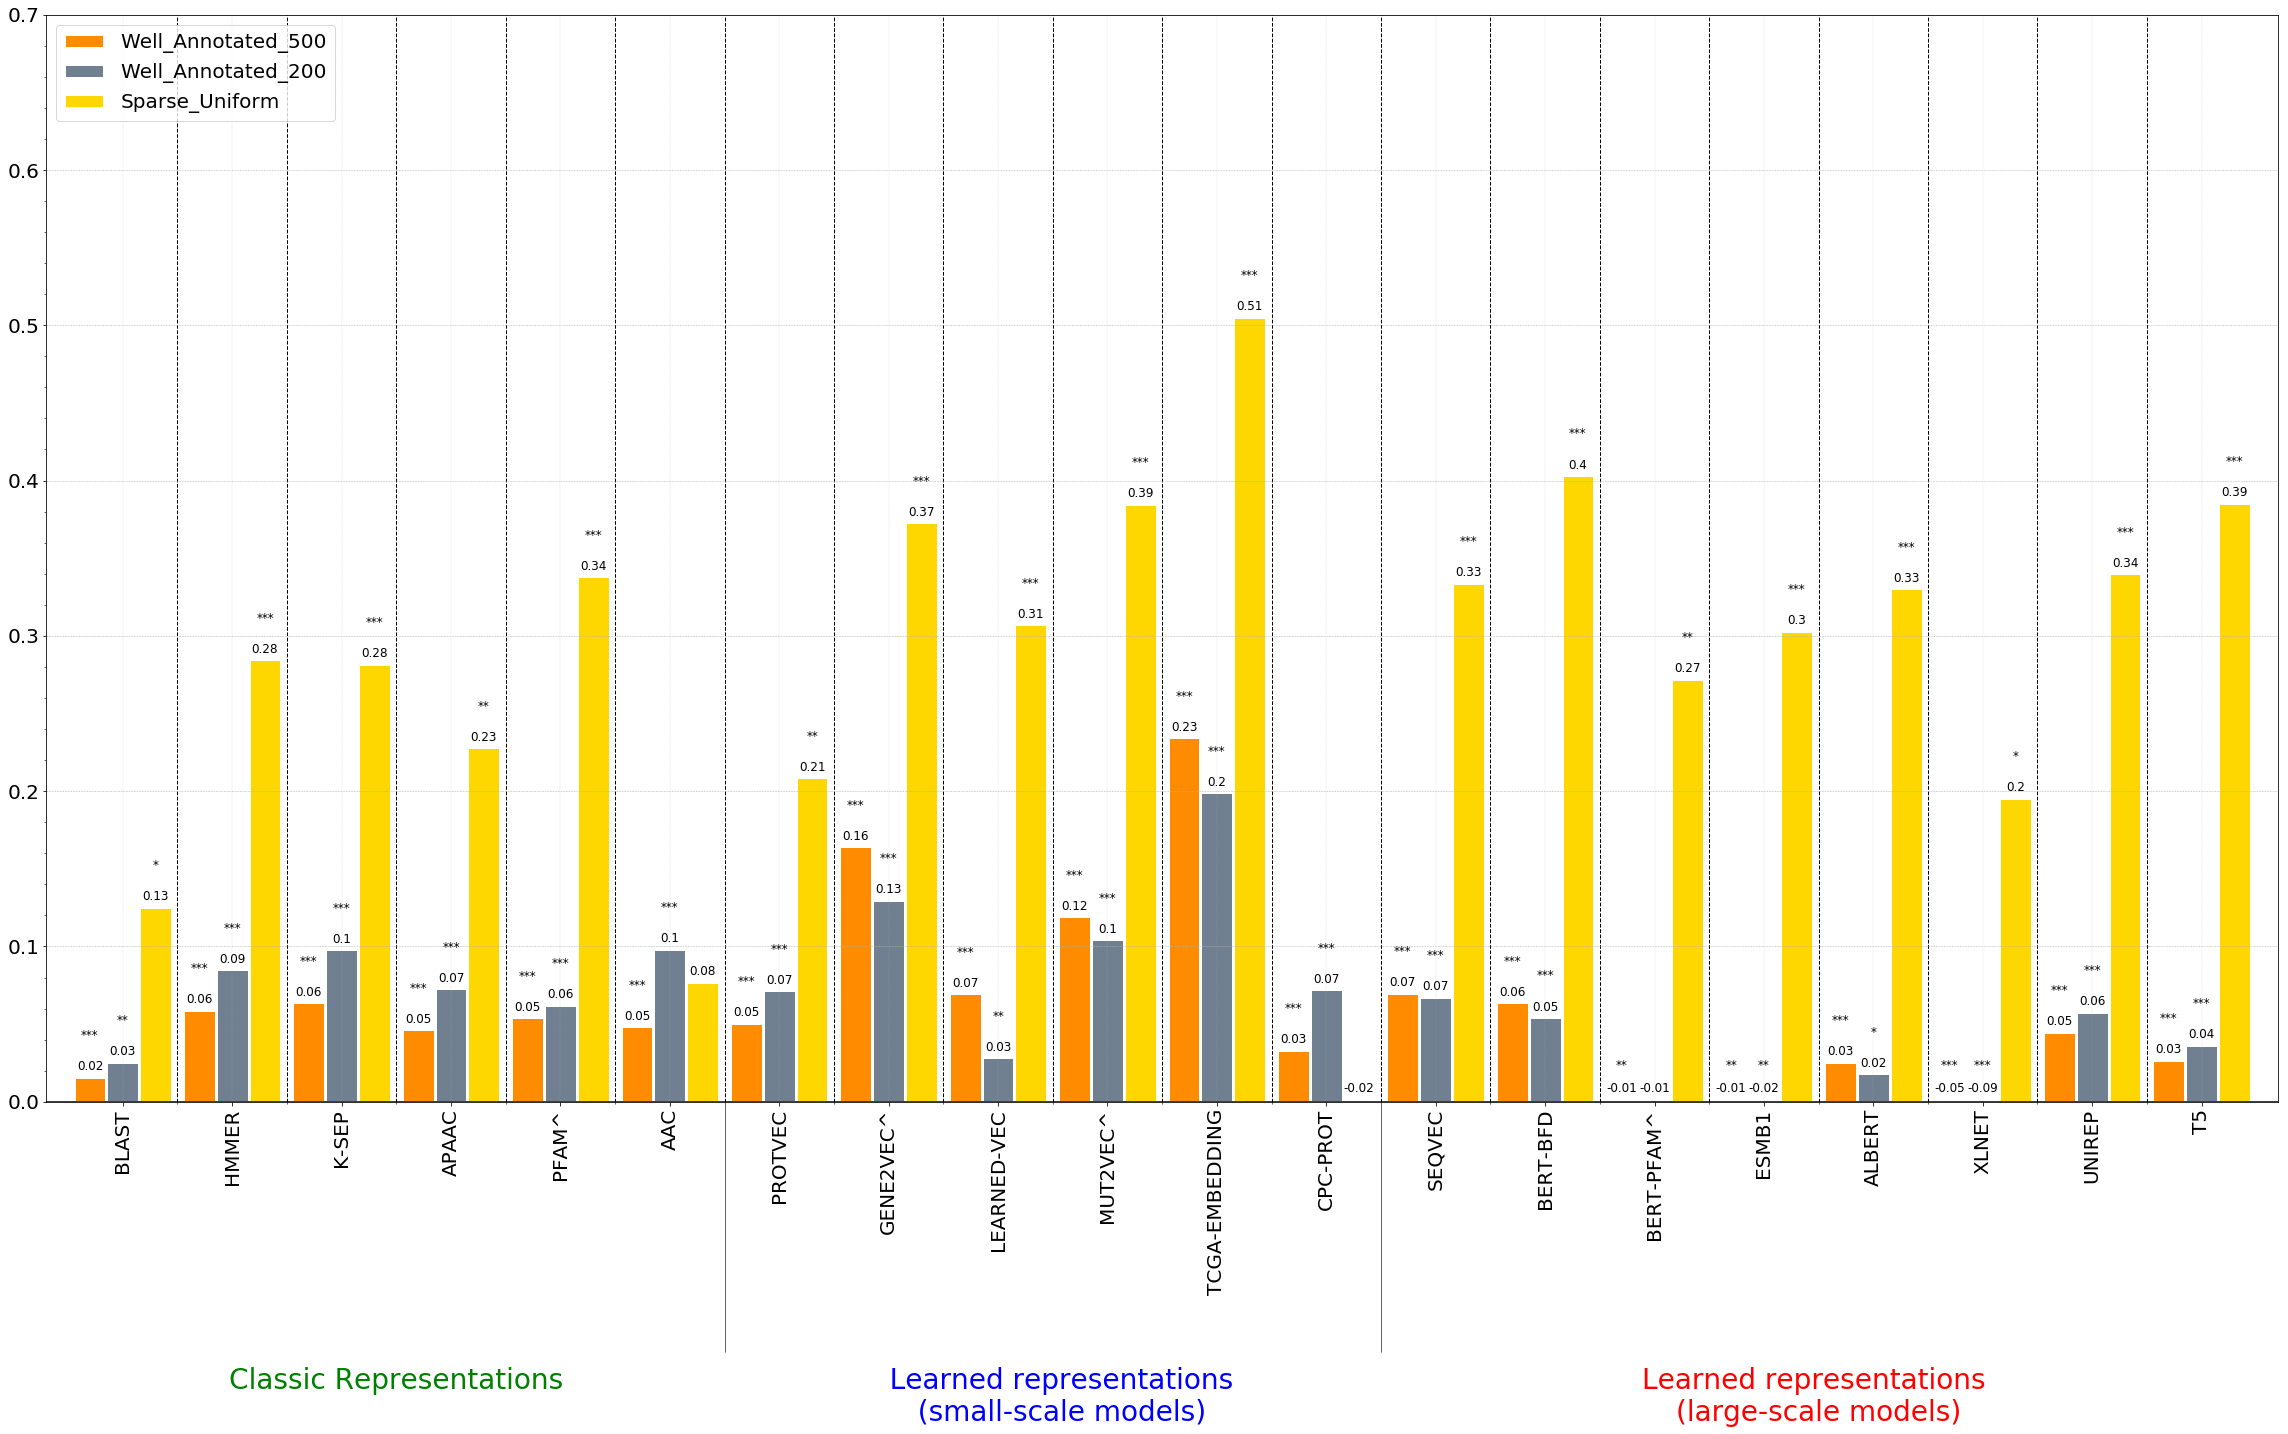

In [43]:
euclidian_MF,euclidian_BP,euclidian_CC,embedding_lables = prepare_data_for_measure('EuclidianSim_Correlation')
euclidian_MF_pvals,euclidian_BP_pvals,euclidian_CC_pvals,embedding_lables = prepare_data_for_measure('EuclidianSim_Correlation p-value')

drawBenchmarks2(euclidian_MF,euclidian_MF_pvals,embedding_lables,"EuclidianSim_Correlation_MF.eps")
drawBenchmarks2(euclidian_BP,euclidian_BP_pvals,embedding_lables,"EuclidianSim_Correlation_BP.eps")
drawBenchmarks2(euclidian_CC,euclidian_CC_pvals,embedding_lables,"EuclidianSim_Correlation_CC.eps")

# Draw scatter plots

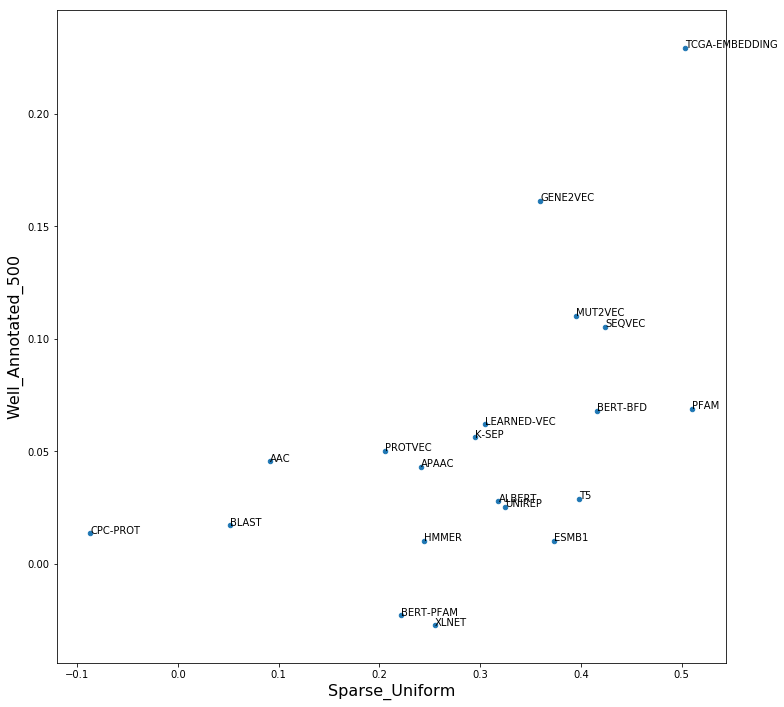

In [36]:
def draw_scatter_plot(df):
    df = df.sort_values(by=['Sparse_Uniform'])
    ax = df.plot.scatter('Sparse_Uniform','Well_Annotated_500',figsize=(12,12))#,fontsize=12)
    x_series = pd.Series(list(df['Sparse_Uniform']))
    y_series = pd.Series(list(df['Well_Annotated_500']))
    labels = pd.Series(['BLAST','HMMER','K-SEP','APAAC','PFAM^','AAC','PROTVEC',\
    'GENE2VEC^','LEARNED-VEC','MUT2VEC^','TCGA-EMBEDDING','CPC-PROT','SEQVEC','BERT-BFD',\
    'BERT-PFAM^','ESMB1','ALBERT','XLNET','UNIREP','T5'])
    labels = pd.Series(list(df.index.get_level_values(0)))
    
    a = pd.concat({'x': x_series, 'y': y_series, 'val': labels}, axis=1)
    index = 0
    for i, point in a.iterrows():
        '''if point['x'] == x_series.max() or point['y'] == y_series.max():
            point['x'] = point['x'] - 0.02             
        if (index%3) == 0:
            point['y'] = point['y'] + 0.002
        elif (index%3) == 1:
            pass
        elif (index%3) == 2:
            point['y'] = point['y'] - 0.003'''

        ax.text(point['x'], point['y'], str(point['val']))#,size=10.0)#,rotation=20)
        index+=1
    
    plt.xlabel('Sparse_Uniform', fontsize=16)
    plt.ylabel('Well_Annotated_500', fontsize=16)
draw_scatter_plot(manhattan_CC)

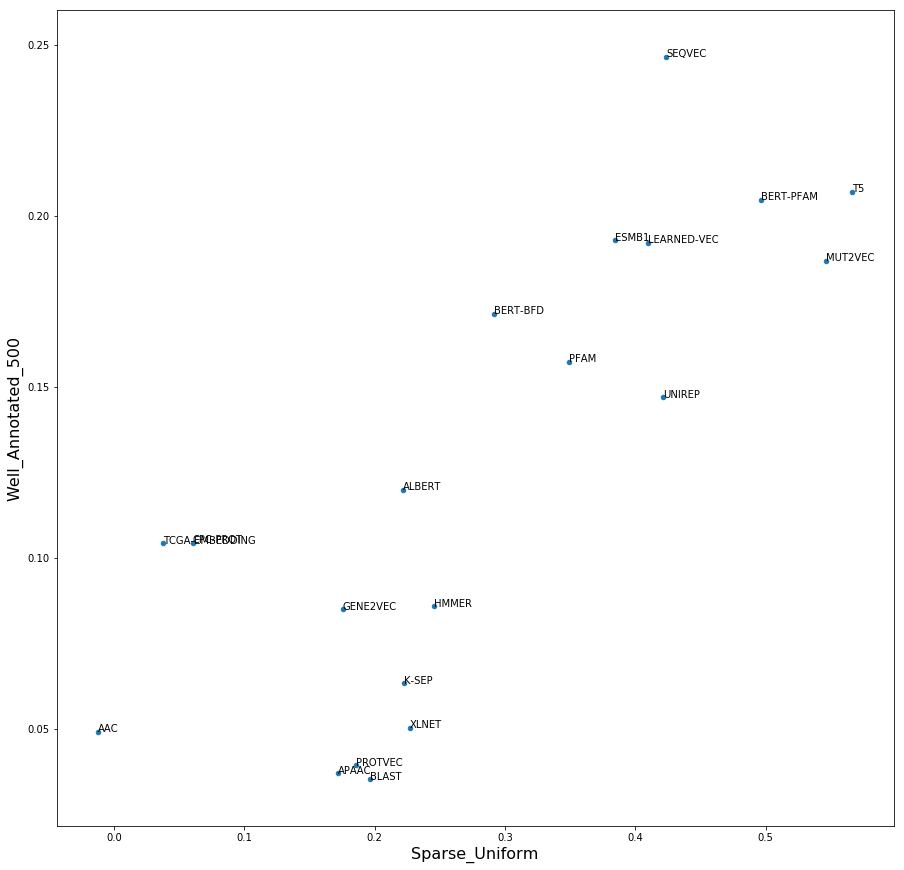

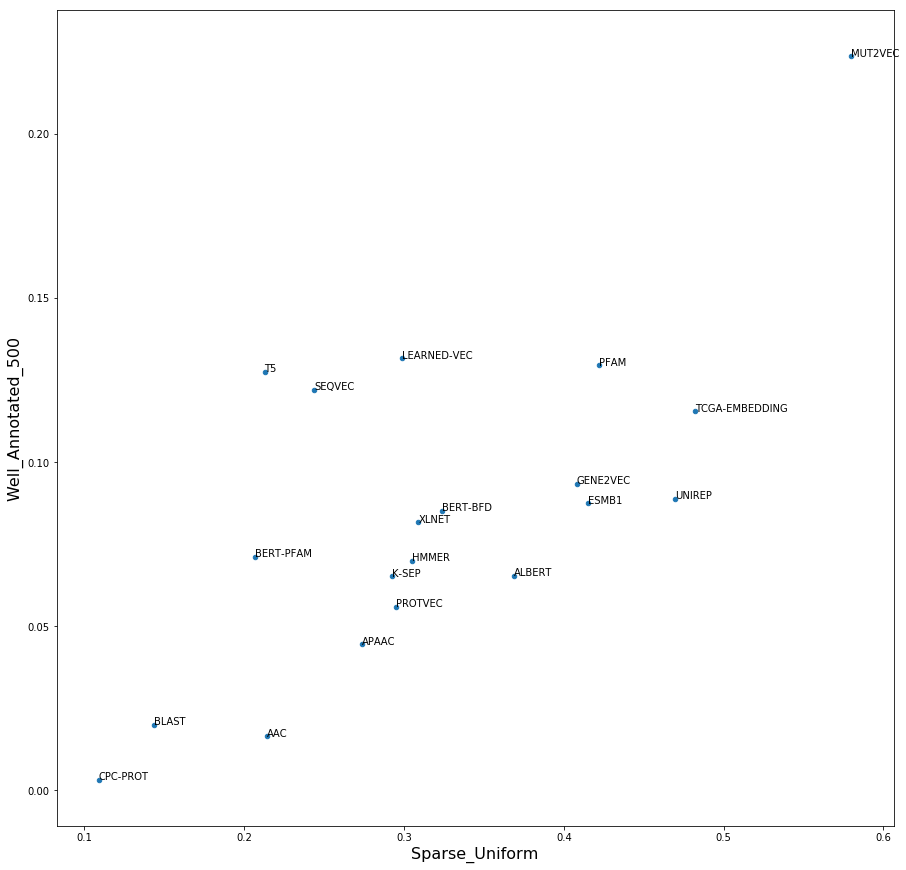

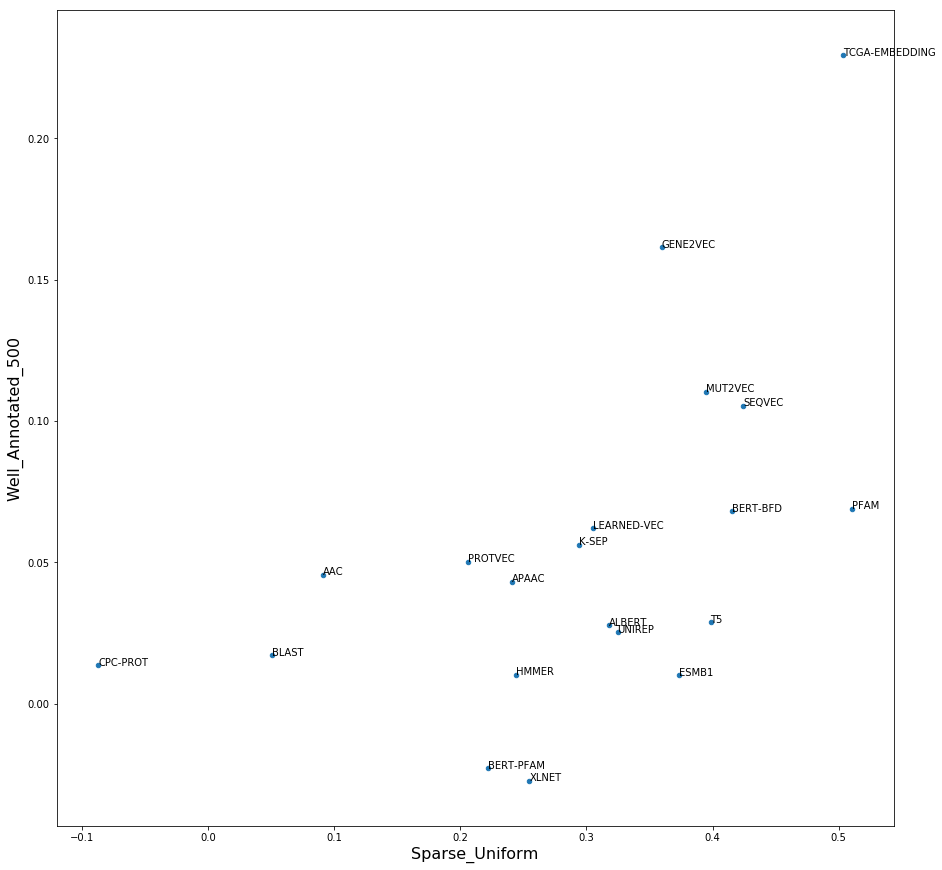

In [35]:
draw_scatter_plot(manhattan_MF)
draw_scatter_plot(manhattan_BP)
draw_scatter_plot(manhattan_CC)

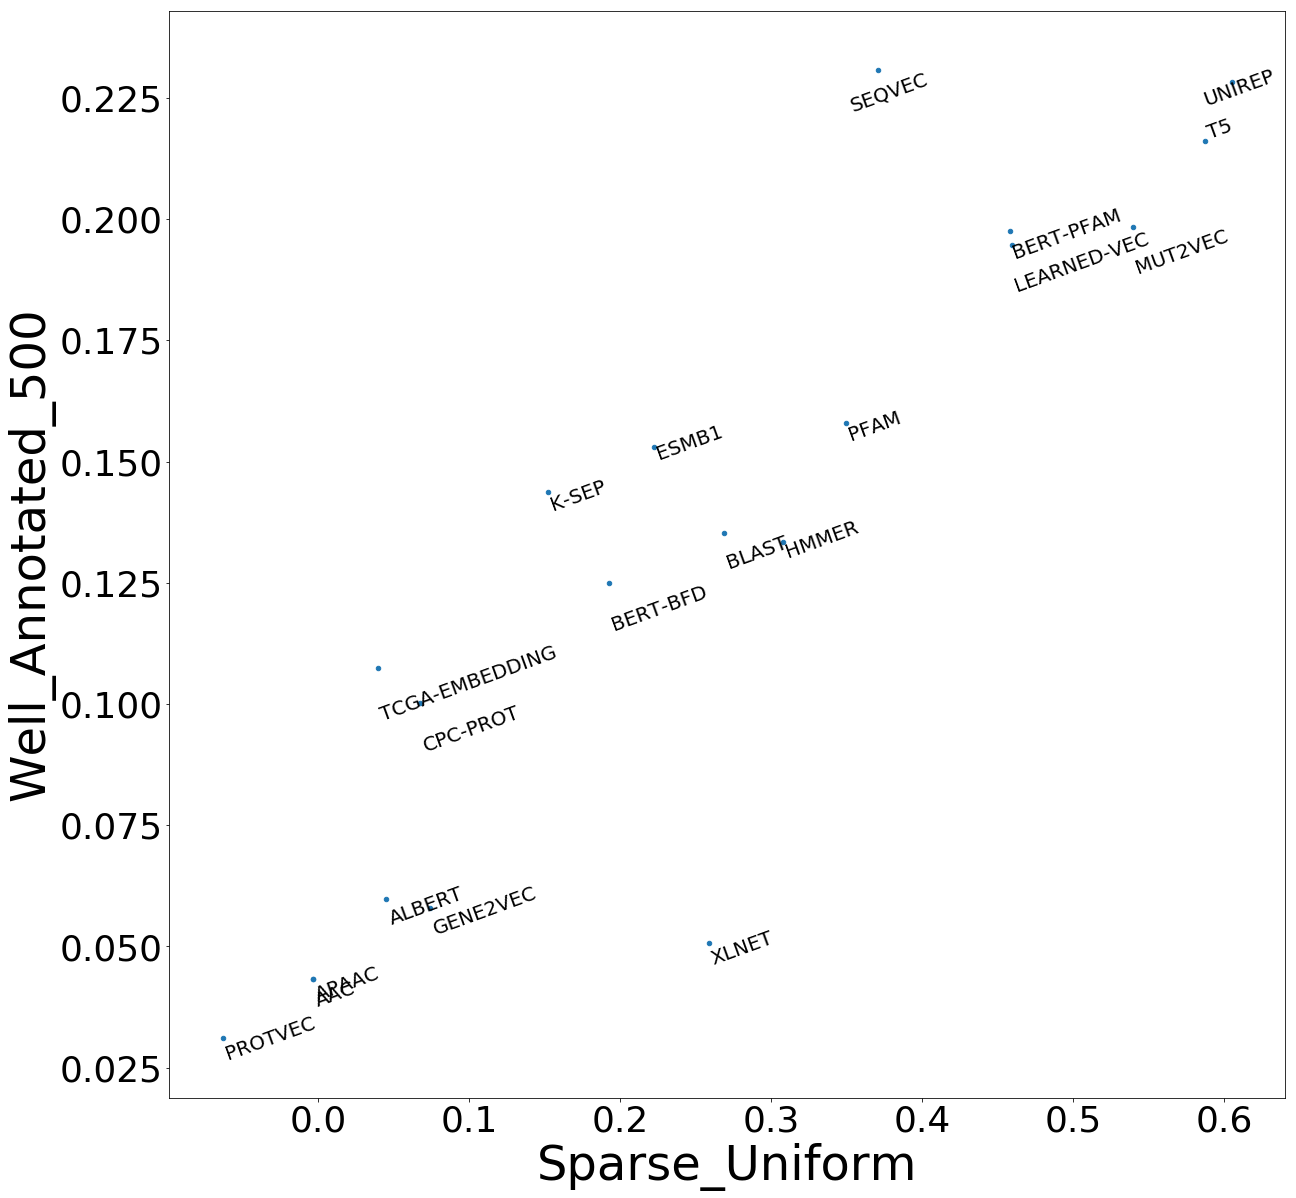

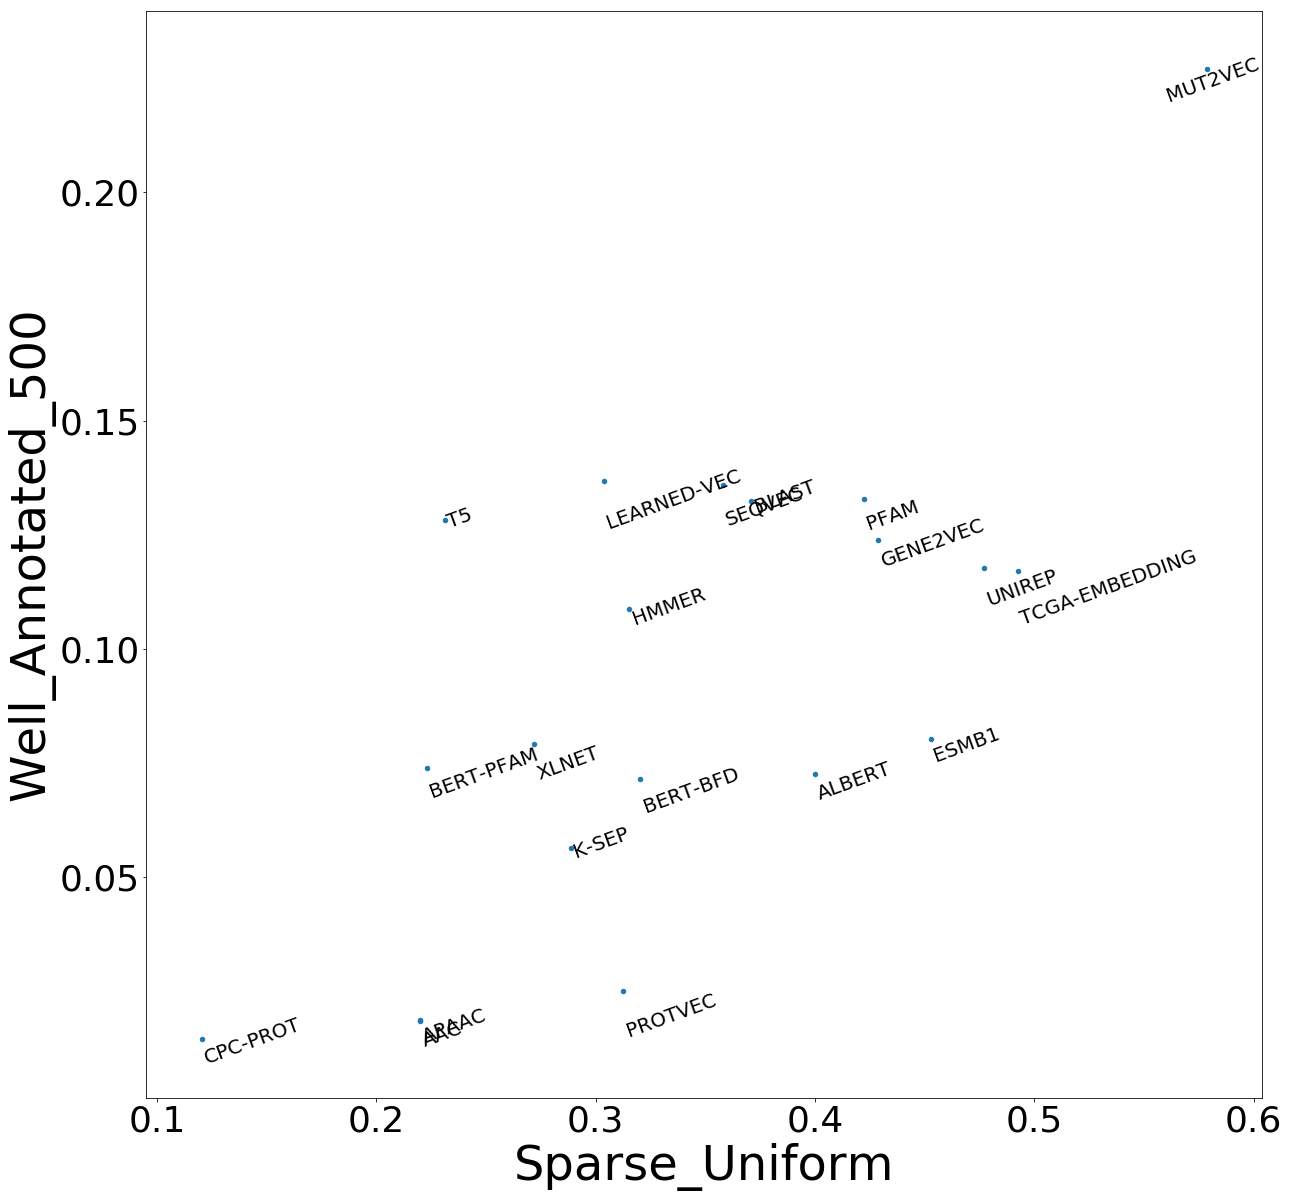

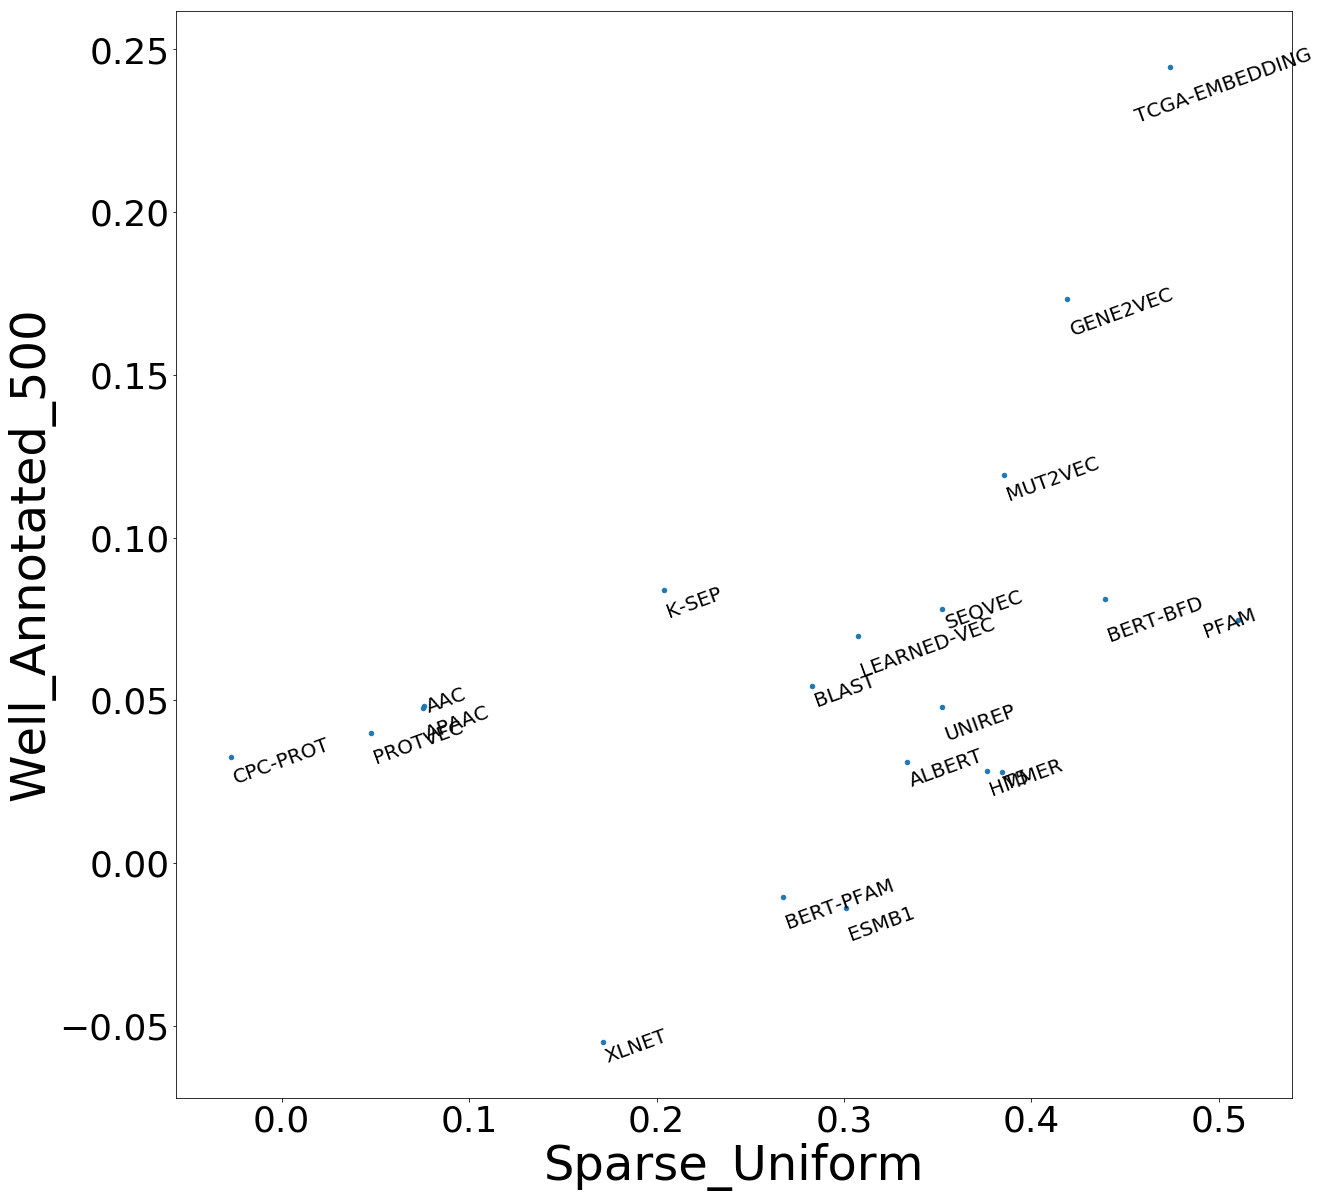

In [16]:
draw_scatter_plot(cosine_MF)
draw_scatter_plot(cosine_BP)
draw_scatter_plot(cosine_CC)

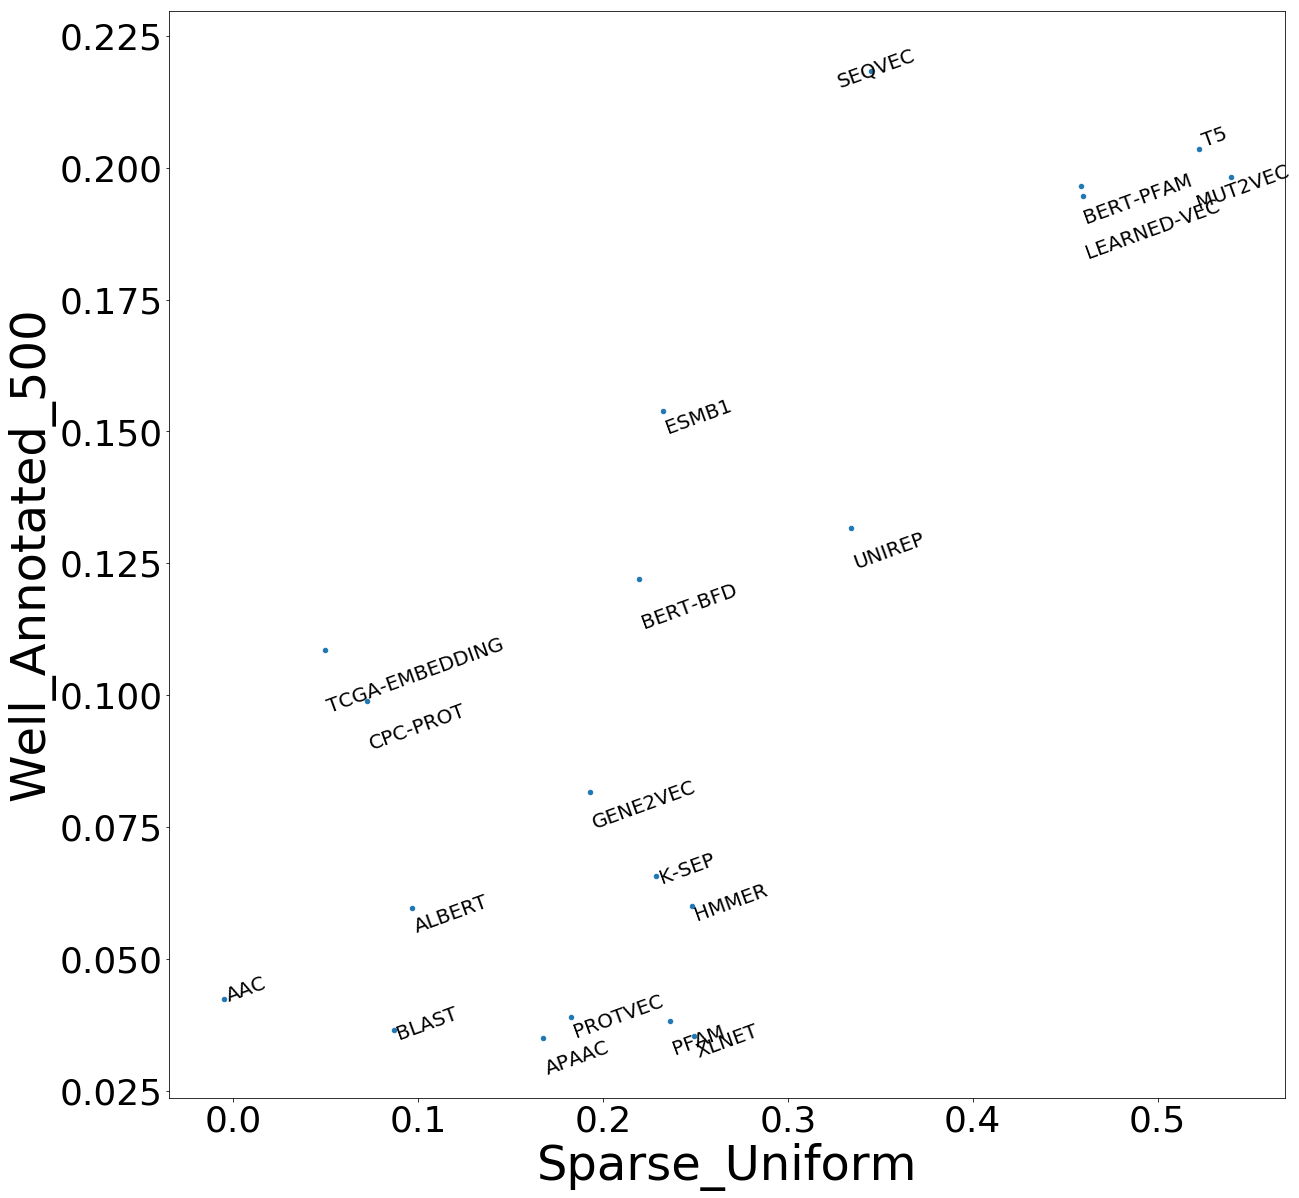

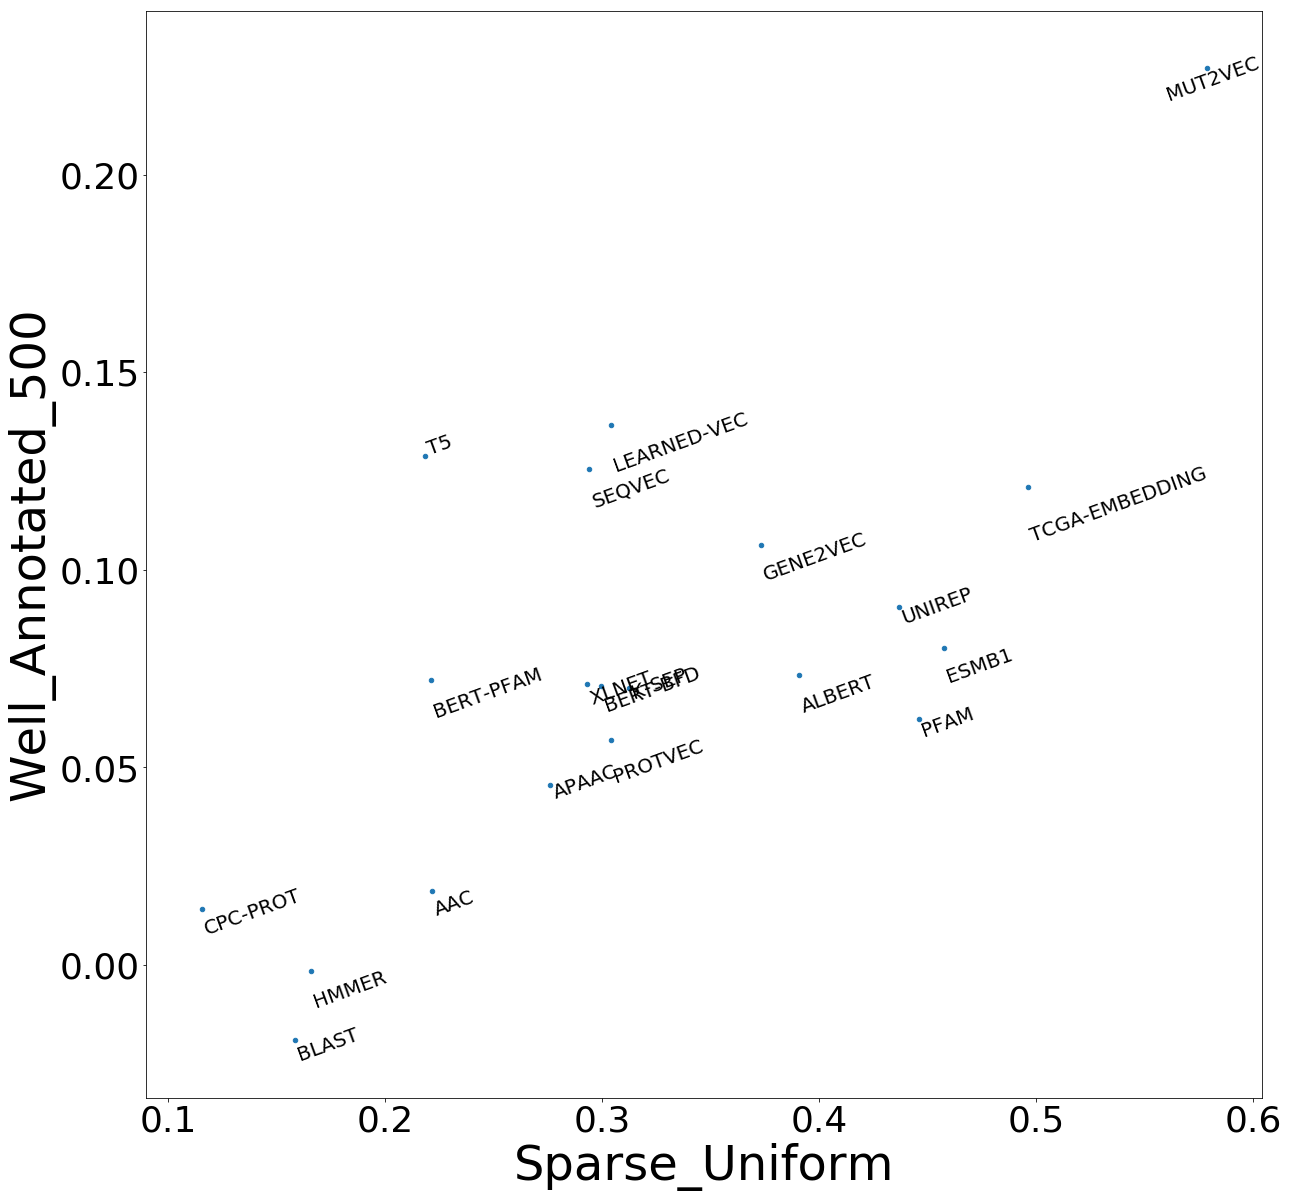

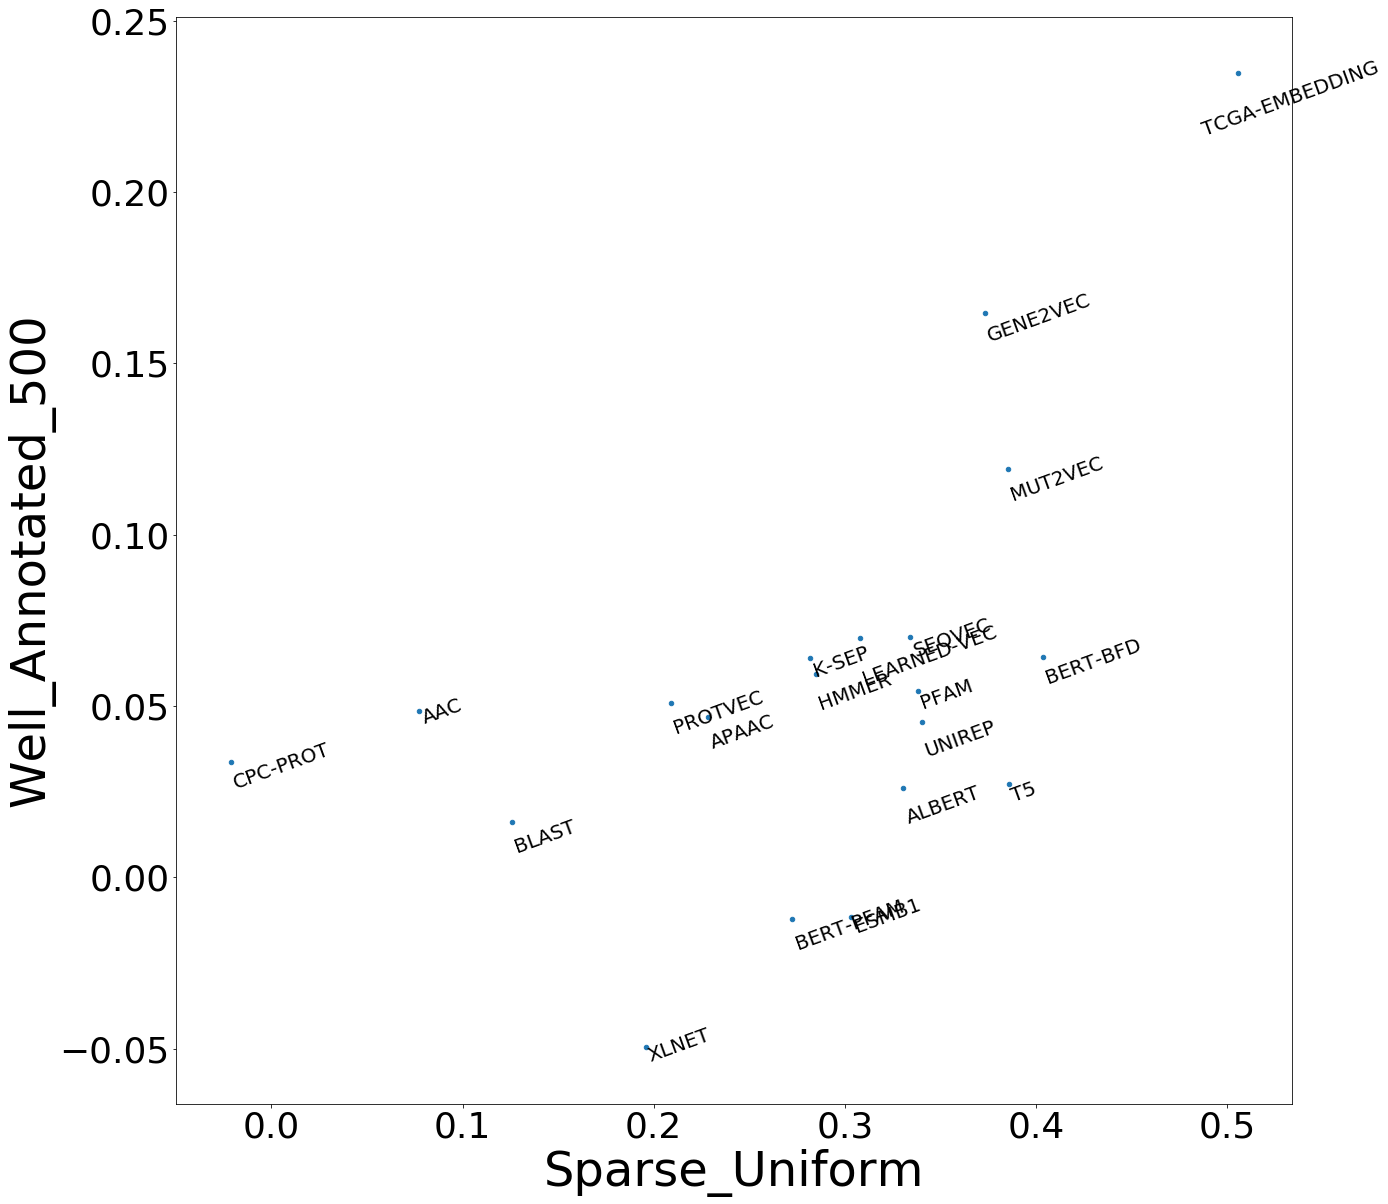

In [17]:
draw_scatter_plot(euclidian_MF)
draw_scatter_plot(euclidian_BP)
draw_scatter_plot(euclidian_CC)

In [47]:
data_save_path = "/media/DATA/serbulent/DATA/Thesis/ReviewPaper/results/revision-1/semantic_similarity/processed/"

In [50]:
manhattan_MF.to_csv(data_save_path+"manhattan_MF.csv")
manhattan_BP.to_csv(data_save_path+"manhattan_BP.csv")
manhattan_CC.to_csv(data_save_path+"manhattan_CC.csv")

cosine_MF.to_csv(data_save_path+"cosine_MF.csv")
cosine_BP.to_csv(data_save_path+"cosine_BP.csv")
cosine_CC.to_csv(data_save_path+"cosine_CC.csv")

euclidian_MF.to_csv(data_save_path+"euclidian_MF.csv")
euclidian_BP.to_csv(data_save_path+"euclidian_BP.csv")
euclidian_CC.to_csv(data_save_path+"euclidian_CC.csv")